Advaserial Attacks - Final Prject
vladimir lihatchv - danel yehuda


In [2]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

# Clear any existing variables and restart fresh
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision import models
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import time

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"✅ OpenMP issue fixed! Using device: {device}")

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()
    print(f"GPU Memory cleared: {torch.cuda.memory_allocated()/1024**3:.2f} GB")

✅ OpenMP issue fixed! Using device: cuda
GPU Memory cleared: 0.00 GB


Organize READFake Dataset for Training

In [1]:
import os
import shutil
from pathlib import Path
from PIL import Image
import numpy as np

def organize_readfake_dataset():
    """Organize READFake dataset into real and fake folders"""
    
    # Source dataset path
    source_path = Path("READFake_Dataset_CVPR2023/READFake_Dataset_CVPR2023/READFake-RGB-images")
    
    # Destination organized path
    dest_path = Path("deepfake_data")
    real_path = dest_path / "real"
    fake_path = dest_path / "fake"
    
    # Create destination directories
    dest_path.mkdir(exist_ok=True)
    real_path.mkdir(exist_ok=True)
    fake_path.mkdir(exist_ok=True)
    
    print(f"🔍 Scanning source directory: {source_path}")
    
    if not source_path.exists():
        print(f"❌ Source path not found: {source_path}")
        print("Please check the dataset path is correct")
        return False
    
    # Get all image files
    image_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.tiff'}
    all_files = []
    
    for ext in image_extensions:
        all_files.extend(source_path.rglob(f"*{ext}"))
        all_files.extend(source_path.rglob(f"*{ext.upper()}"))
    
    print(f"📁 Found {len(all_files)} image files")
    
    real_count = 0
    fake_count = 0
    error_count = 0
    
    for img_file in all_files:
        try:
            filename = img_file.name.lower()
            
            # Check if filename contains "fake" or "real"
            if "fake" in filename:
                # Copy to fake folder
                dest_file = fake_path / f"fake_{fake_count:04d}.jpg"
                
                # Open, resize, and save image
                img = Image.open(img_file).convert('RGB')
                img = img.resize((224, 224))
                img.save(dest_file, quality=95)
                
                fake_count += 1
                
                if fake_count % 50 == 0:
                    print(f"  Processed {fake_count} fake images...")
                    
            elif "real" in filename:
                # Copy to real folder
                dest_file = real_path / f"real_{real_count:04d}.jpg"
                
                # Open, resize, and save image
                img = Image.open(img_file).convert('RGB')
                img = img.resize((224, 224))
                img.save(dest_file, quality=95)
                
                real_count += 1
                
                if real_count % 50 == 0:
                    print(f"  Processed {real_count} real images...")
            else:
                # Check parent directory names for classification
                path_str = str(img_file).lower()
                
                if "fake" in path_str:
                    dest_file = fake_path / f"fake_{fake_count:04d}.jpg"
                    img = Image.open(img_file).convert('RGB')
                    img = img.resize((224, 224))
                    img.save(dest_file, quality=95)
                    fake_count += 1
                elif "real" in path_str:
                    dest_file = real_path / f"real_{real_count:04d}.jpg"
                    img = Image.open(img_file).convert('RGB')
                    img = img.resize((224, 224))
                    img.save(dest_file, quality=95)
                    real_count += 1
                else:
                    print(f"  ⚠️ Unclear classification for: {filename}")
                    error_count += 1
                    
        except Exception as e:
            print(f"  ❌ Error processing {img_file.name}: {e}")
            error_count += 1
    
    print(f"\n📊 Dataset Organization Complete:")
    print(f"✅ Real images processed: {real_count}")
    print(f"✅ Fake images processed: {fake_count}")
    print(f"✅ Total organized: {real_count + fake_count}")
    
    if error_count > 0:
        print(f"⚠️ Files with errors: {error_count}")
    
    return real_count > 0 and fake_count > 0

def verify_organized_dataset():
    """Verify the organized dataset structure"""
    
    data_path = Path("deepfake_data")
    real_path = data_path / "real"
    fake_path = data_path / "fake"
    
    if not data_path.exists():
        print("❌ Dataset not found!")
        return False
    
    real_files = list(real_path.glob("*.jpg"))
    fake_files = list(fake_path.glob("*.jpg"))
    
    print(f"\n🔍 Dataset Verification:")
    print(f"📁 Real images: {len(real_files)}")
    print(f"📁 Fake images: {len(fake_files)}")
    print(f"📁 Total images: {len(real_files) + len(fake_files)}")
    
    # Show sample filenames
    if real_files:
        print(f"📄 Sample real files: {[f.name for f in real_files[:3]]}")
    if fake_files:
        print(f"📄 Sample fake files: {[f.name for f in fake_files[:3]]}")
    
    # Test loading a few images
    try:
        if real_files:
            img = Image.open(real_files[0])
            print(f"✅ Real image test: {img.size} pixels, {img.mode} mode")
        
        if fake_files:
            img = Image.open(fake_files[0])
            print(f"✅ Fake image test: {img.size} pixels, {img.mode} mode")
            
        print("✅ Dataset ready for training!")
        return True
        
    except Exception as e:
        print(f"❌ Error testing images: {e}")
        return False

# Execute organization
print("🚀 Organizing READFake dataset...")
success = organize_readfake_dataset()

if success:
    verify_organized_dataset()
    print("\n🎉 READFake dataset organized successfully!")
    print("📂 Structure: deepfake_data/real/ and deepfake_data/fake/")
else:
    print("❌ Dataset organization failed. Please check the path.")

🚀 Organizing READFake dataset...
🔍 Scanning source directory: READFake_Dataset_CVPR2023\READFake_Dataset_CVPR2023\READFake-RGB-images
📁 Found 4274 image files
  Processed 50 fake images...
  Processed 100 fake images...
  Processed 150 fake images...
  Processed 200 fake images...
  Processed 250 fake images...
  Processed 300 fake images...
  Processed 350 fake images...
  Processed 400 fake images...
  Processed 50 real images...
  Processed 450 fake images...
  Processed 500 fake images...
  Processed 550 fake images...
  Processed 600 fake images...
  Processed 650 fake images...
  Processed 700 fake images...
  Processed 750 fake images...
  Processed 800 fake images...
  Processed 850 fake images...
  Processed 900 fake images...
  Processed 950 fake images...
  Processed 1000 fake images...
  Processed 1050 fake images...
  Processed 1100 fake images...
  Processed 1150 fake images...
  Processed 1200 fake images...
  Processed 1250 fake images...
  Processed 1300 fake images...

Try to initialize a new Deepfake Detection Model and Training Setup

In [2]:

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from torchvision import models
import os
from PIL import Image
from pathlib import Path

class DeepfakeDataset(Dataset):
    """Custom dataset for deepfake detection"""
    
    def __init__(self, data_dir, transform=None):
        self.data_dir = Path(data_dir)
        self.transform = transform
        self.samples = []
        
        # Load real images (label = 0)
        real_dir = self.data_dir / "real"
        if real_dir.exists():
            for img_path in real_dir.glob("*.jpg"):
                self.samples.append((str(img_path), 0))
        
        # Load fake images (label = 1)
        fake_dir = self.data_dir / "fake"
        if fake_dir.exists():
            for img_path in fake_dir.glob("*.jpg"):
                self.samples.append((str(img_path), 1))
        
        print(f"✓ Loaded {len(self.samples)} images total")
        print(f"  Real images: {len([s for s in self.samples if s[1] == 0])}")
        print(f"  Fake images: {len([s for s in self.samples if s[1] == 1])}")
    
    def __len__(self):
        return len(self.samples)
    
    def __getitem__(self, idx):
        img_path, label = self.samples[idx]
        try:
            image = Image.open(img_path).convert('RGB')
            
            if self.transform:
                image = self.transform(image)
            
            return image, label
        except Exception as e:
            print(f"Error loading {img_path}: {e}")
            # Return a dummy tensor if image fails to load
            dummy_image = torch.zeros(3, 224, 224)
            return dummy_image, label

class DeepfakeDetector(nn.Module):
    """CNN for deepfake detection"""
    
    def __init__(self, num_classes=2):
        super(DeepfakeDetector, self).__init__()
        
        # Feature extraction layers
        self.features = nn.Sequential(
            # First conv block
            nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1),
            
            # Second conv block
            nn.Conv2d(64, 128, kernel_size=5, padding=2),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            
            # Third conv block
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            
            # Fourth conv block
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.AdaptiveAvgPool2d((1, 1))
        )
        
        # Classification head
        self.classifier = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, num_classes)
        )
    
    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

# Data preprocessing transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                        std=[0.229, 0.224, 0.225])
])

# Create dataset and dataloaders
try:
    print("🔄 Loading READFake dataset...")
    dataset = DeepfakeDataset("deepfake_data", transform=transform)
    
    if len(dataset) == 0:
        print("❌ No images found! Please run the dataset organization cell first.")
    else:
        # Split dataset into train and validation
        train_size = int(0.8 * len(dataset))
        val_size = len(dataset) - train_size
        train_dataset, val_dataset = torch.utils.data.random_split(
            dataset, [train_size, val_size], 
            generator=torch.Generator().manual_seed(42)
        )
        
        # Create dataloaders
        batch_size = 16
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
        val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
        
        # Initialize model
        model = DeepfakeDetector().to(device)
        
        # Loss function and optimizer
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
        scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)
        
        print(f"✓ Model initialized on {device}")
        print(f"✓ Training samples: {len(train_dataset)}")
        print(f"✓ Validation samples: {len(val_dataset)}")
        print(f"✓ Batch size: {batch_size}")
        print(f"✓ Learning rate: 0.001")
        print("✓ Ready for training on real deepfake data!")
        
        # Model summary
        total_params = sum(p.numel() for p in model.parameters())
        trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
        print(f"📊 Model parameters: {total_params:,} total, {trainable_params:,} trainable")
        
except Exception as e:
    print(f"❌ Error setting up model: {e}")
    print("Please make sure the dataset was organized successfully.")

🔄 Loading READFake dataset...
✓ Loaded 4274 images total
  Real images: 1432
  Fake images: 2842
✓ Model initialized on cuda
✓ Training samples: 3419
✓ Validation samples: 855
✓ Batch size: 16
✓ Learning rate: 0.001
✓ Ready for training on real deepfake data!
📊 Model parameters: 1,757,570 total, 1,757,570 trainable


Train Model and Plot Learning Curves

In [ ]:
import time
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('inline')
plt.ioff()

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=12):
    """Train the deepfake detector and track metrics"""
    
    print(f"🚀 Starting training for {num_epochs} epochs...")
    
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []
    
    for epoch in range(num_epochs):
        start_time = time.time()
        
        # Training phase
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        
        for batch_idx, (images, labels) in enumerate(train_loader):
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()
            
            if batch_idx % 15 == 0:
                print(f'Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx+1}/{len(train_loader)}], Loss: {loss.item():.4f}')
        
        train_loss = running_loss / len(train_loader)
        train_acc = 100 * correct_train / total_train
        
        # Validation phase
        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0
        
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()
        
        val_loss = val_loss / len(val_loader)
        val_acc = 100 * correct_val / total_val
        
        # Store metrics for plotting
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)
        
        epoch_time = time.time() - start_time
        
        print(f'Epoch [{epoch+1}/{num_epochs}] ({epoch_time:.1f}s)')
        print(f'  Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%')
        print(f'  Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')
        print('-' * 50)
    
    return train_losses, val_losses, train_accuracies, val_accuracies

def plot_learning_curves(train_losses, val_losses, train_accuracies, val_accuracies):
    """Plot learning curves"""
    try:
        plt.clf()
        plt.close('all')
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
        
        epochs = range(1, len(train_losses) + 1)
        
        # Loss plot
        ax1.plot(epochs, train_losses, 'b-', label='Train Loss', linewidth=2)
        ax1.plot(epochs, val_losses, 'r-', label='Validation Loss', linewidth=2)
        ax1.set_title('Training and Validation Loss', fontsize=14, fontweight='bold')
        ax1.set_xlabel('Epoch', fontsize=12)
        ax1.set_ylabel('Loss', fontsize=12)
        ax1.legend(fontsize=11)
        ax1.grid(True, alpha=0.3)
        
        # Accuracy plot
        ax2.plot(epochs, train_accuracies, 'b-', label='Train Accuracy', linewidth=2)
        ax2.plot(epochs, val_accuracies, 'r-', label='Validation Accuracy', linewidth=2)
        ax2.set_title('Training and Validation Accuracy', fontsize=14, fontweight='bold')
        ax2.set_xlabel('Epoch', fontsize=12)
        ax2.set_ylabel('Accuracy (%)', fontsize=12)
        ax2.legend(fontsize=11)
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout(pad=3.0)
        plt.show()
        
        # Print final results
        print(f"\n📈 Final Training Results:")
        print(f"🎯 Train Loss: {train_losses[-1]:.4f}")
        print(f"🎯 Val Loss: {val_losses[-1]:.4f}")
        print(f"🎯 Train Accuracy: {train_accuracies[-1]:.2f}%")
        print(f"🎯 Val Accuracy: {val_accuracies[-1]:.2f}%")
        
    except Exception as e:
        print(f"Plotting failed: {e}")
        print("📊 Text summary:")
        for i, (tl, vl, ta, va) in enumerate(zip(train_losses, val_losses, train_accuracies, val_accuracies)):
            print(f"Epoch {i+1}: Train({ta:.1f}%) Val({va:.1f}%)")

# Execute training
print("🔥 Starting deepfake detector training...")
train_losses, val_losses, train_accs, val_accs = train_model(
    model, train_loader, val_loader, criterion, optimizer, num_epochs=12
)

# Plot learning curves
plot_learning_curves(train_losses, val_losses, train_accs, val_accs)

# Save trained model
torch.save(model.state_dict(), 'deepfake_detector.pth')
print("💾 Model saved successfully!")

🔥 Starting deepfake detector training...
🚀 Starting training for 12 epochs...


Deepfake Detection with EfficientNetB4ST

In [3]:
# Test GPU Memory Capacity
import torch

print("=== GPU CAPACITY TEST ===")
print(f"Device: {device}")

if torch.cuda.is_available():
    # Get GPU info
    gpu_name = torch.cuda.get_device_name(0)
    total_memory = torch.cuda.get_device_properties(0).total_memory / 1024**3
    
    print(f"GPU Name: {gpu_name}")
    print(f"Total GPU Memory: {total_memory:.2f} GB")
    print(f"Currently allocated: {torch.cuda.memory_allocated()/1024**3:.2f} GB")
    
    # Test loading a small model
    print("\n🧪 Testing GPU with small model...")
    test_model = torch.nn.Linear(1000, 100).to(device)
    test_tensor = torch.randn(32, 1000).to(device)
    
    print(f"After loading test model: {torch.cuda.memory_allocated()/1024**3:.2f} GB")
    
    # Test with larger tensor
    big_tensor = torch.randn(1000, 1000, 100).to(device)
    print(f"After big tensor: {torch.cuda.memory_allocated()/1024**3:.2f} GB")
    
    # Clear memory
    del test_model, test_tensor, big_tensor
    torch.cuda.empty_cache()
    print(f"After cleanup: {torch.cuda.memory_allocated()/1024**3:.2f} GB")
    
else:
    print("CUDA not available")

=== GPU CAPACITY TEST ===
Device: cuda
GPU Name: NVIDIA GeForce RTX 2060
Total GPU Memory: 6.00 GB
Currently allocated: 0.00 GB

🧪 Testing GPU with small model...
After loading test model: 0.00 GB
After big tensor: 0.37 GB
After cleanup: 0.00 GB


Dataset loaded: 4274 images
Real: 1432
Fake: 2842
Dataset loaded: 4274 images
Real: 1432
Fake: 2842
Initializing EfficientNet-B4...
Model loaded on cuda
Parameters: 18,467,658
Training EfficientNet-B4...
Starting training for 8 epochs...
Epoch [1/8], Batch [1], Loss: 0.6969
Epoch [1/8], Batch [21], Loss: 0.3718
Epoch [1/8], Batch [41], Loss: 0.4498
Epoch [1/8], Batch [61], Loss: 0.4941
Epoch [1/8], Batch [81], Loss: 0.4576
Epoch [1/8], Batch [101], Loss: 0.1035
Epoch [1/8], Batch [121], Loss: 0.3860
Epoch [1/8], Batch [141], Loss: 0.2173
Epoch [1/8], Batch [161], Loss: 0.9271
Epoch [1/8], Batch [181], Loss: 0.0761
Epoch [1/8], Batch [201], Loss: 0.0846
Epoch [1/8] (149.0s)
Train Loss: 0.4023, Train Acc: 82.77%
Val Loss: 0.3495, Val Acc: 86.78%
Learning Rate: 0.000962
------------------------------------------------------------
Epoch [2/8], Batch [1], Loss: 0.1585
Epoch [2/8], Batch [21], Loss: 0.3840
Epoch [2/8], Batch [41], Loss: 0.1002
Epoch [2/8], Batch [61], Loss: 0.1156
Epoch [2/8

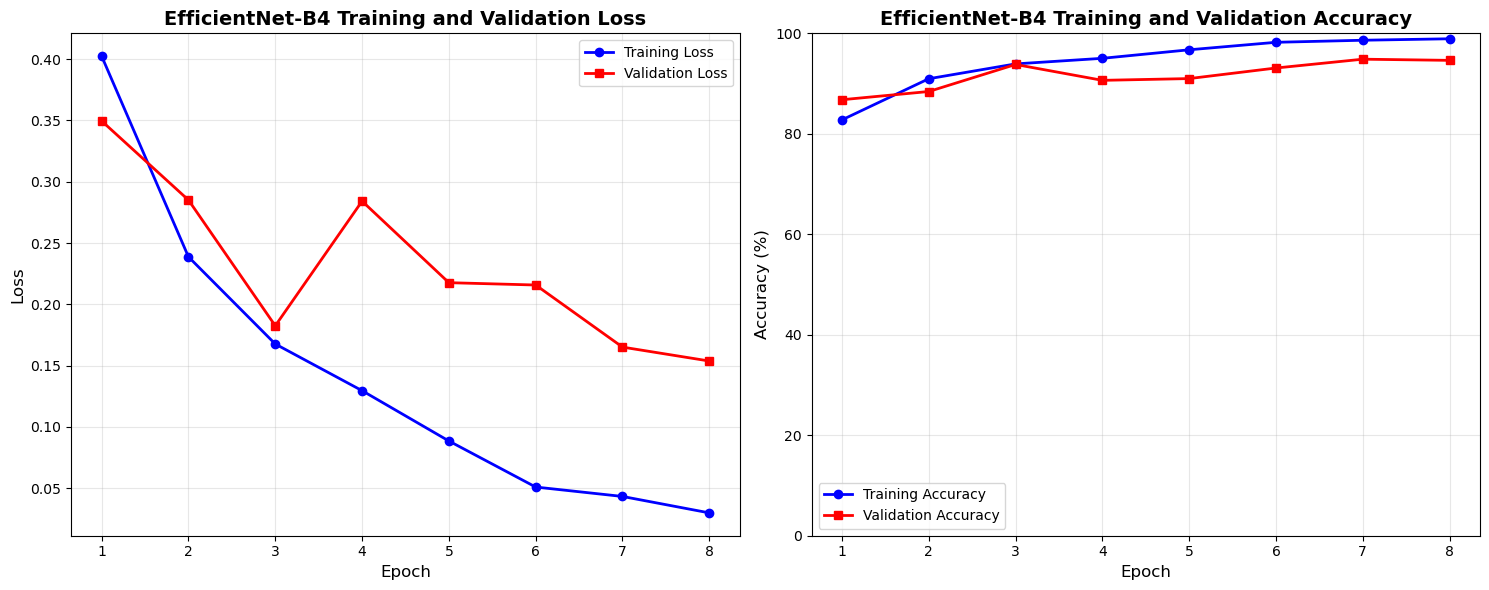


Training Complete!
Final Results:
Training Loss: 0.0299
Validation Loss: 0.1538
Training Accuracy: 98.92%
Validation Accuracy: 94.62%
Best Validation Accuracy: 94.85%
Model saved successfully!

Model Summary:
Architecture: EfficientNet-B4
Total Parameters: 18,467,658
Dataset: READFake
Ready for adversarial attacks!


In [6]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision import models
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import time

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class DeepfakeDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = Path(data_dir)
        self.transform = transform
        self.samples = []
        
        real_dir = self.data_dir / "real"
        if real_dir.exists():
            for img_path in real_dir.glob("*.jpg"):
                self.samples.append((str(img_path), 0))
        
        fake_dir = self.data_dir / "fake"
        if fake_dir.exists():
            for img_path in fake_dir.glob("*.jpg"):
                self.samples.append((str(img_path), 1))
        
        print(f"Dataset loaded: {len(self.samples)} images")
        print(f"Real: {len([s for s in self.samples if s[1] == 0])}")
        print(f"Fake: {len([s for s in self.samples if s[1] == 1])}")
    
    def __len__(self):
        return len(self.samples)
    
    def __getitem__(self, idx):
        img_path, label = self.samples[idx]
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, label

# Enhanced data transforms with augmentation
transform_train = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomCrop(224),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=5),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

transform_val = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create datasets
train_dataset_full = DeepfakeDataset("deepfake_data", transform=transform_train)
val_dataset_full = DeepfakeDataset("deepfake_data", transform=transform_val)

# Split dataset
train_size = int(0.8 * len(train_dataset_full))
val_size = len(train_dataset_full) - train_size
train_dataset, _ = torch.utils.data.random_split(train_dataset_full, [train_size, val_size])
_, val_dataset = torch.utils.data.random_split(val_dataset_full, [train_size, val_size])

# Create dataloaders with larger batch size
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, num_workers=0)

# Initialize EfficientNet-B4
print("Initializing EfficientNet-B4...")
model = models.efficientnet_b4(pretrained=True)

# Freeze early layers for transfer learning
for param in model.features[:6].parameters():
    param.requires_grad = False

# Modify classifier
num_features = model.classifier[1].in_features
model.classifier = nn.Sequential(
    nn.Dropout(0.3),
    nn.Linear(num_features, 512),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(512, 2)
)

model = model.to(device)
print(f"Model loaded on {device}")
print(f"Parameters: {sum(p.numel() for p in model.parameters()):,}")

# Improved training function
def train_efficientnet_improved(model, train_loader, val_loader, num_epochs=8):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)
    scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs)
    
    print(f"Starting training for {num_epochs} epochs...")
    
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []
    
    best_val_acc = 0.0
    
    for epoch in range(num_epochs):
        start_time = time.time()
        
        # Training phase
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        
        for batch_idx, (images, labels) in enumerate(train_loader):
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()
            
            if batch_idx % 20 == 0:
                print(f'Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx+1}], Loss: {loss.item():.4f}')
        
        train_loss = running_loss / len(train_loader)
        train_acc = 100 * correct_train / total_train
        
        # Validation phase
        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0
        
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()
        
        val_loss = val_loss / len(val_loader)
        val_acc = 100 * correct_val / total_val
        
        # Update learning rate
        scheduler.step()
        
        # Store metrics
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)
        
        # Save best model
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), 'best_efficientnet_b4.pth')
        
        epoch_time = time.time() - start_time
        print(f'Epoch [{epoch+1}/{num_epochs}] ({epoch_time:.1f}s)')
        print(f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%')
        print(f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')
        print(f'Learning Rate: {scheduler.get_last_lr()[0]:.6f}')
        print('-' * 60)
        
        # Unfreeze more layers after 5 epochs
        if epoch == 4:
            for param in model.features.parameters():
                param.requires_grad = True
            optimizer = torch.optim.AdamW(model.parameters(), lr=0.0001, weight_decay=0.01)
            scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs-5)
            print("Unfroze all layers, reduced learning rate")
    
    return train_losses, val_losses, train_accuracies, val_accuracies

# Train the model
print("Training EfficientNet-B4...")
train_losses, val_losses, train_accs, val_accs = train_efficientnet_improved(
    model, train_loader, val_loader, num_epochs=8
)

# Plot results
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_losses) + 1), train_losses, 'b-', label='Training Loss', linewidth=2, marker='o')
plt.plot(range(1, len(val_losses) + 1), val_losses, 'r-', label='Validation Loss', linewidth=2, marker='s')
plt.title('EfficientNet-B4 Training and Validation Loss', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_accs) + 1), train_accs, 'b-', label='Training Accuracy', linewidth=2, marker='o')
plt.plot(range(1, len(val_accs) + 1), val_accs, 'r-', label='Validation Accuracy', linewidth=2, marker='s')
plt.title('EfficientNet-B4 Training and Validation Accuracy', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0, 100)

plt.tight_layout()
plt.show()

# Print final results
print(f"\nTraining Complete!")
print(f"Final Results:")
print(f"Training Loss: {train_losses[-1]:.4f}")
print(f"Validation Loss: {val_losses[-1]:.4f}")
print(f"Training Accuracy: {train_accs[-1]:.2f}%")
print(f"Validation Accuracy: {val_accs[-1]:.2f}%")
print(f"Best Validation Accuracy: {max(val_accs):.2f}%")

# Save final model
torch.save(model.state_dict(), 'efficientnet_b4_final.pth')
print("Model saved successfully!")

print(f"\nModel Summary:")
print(f"Architecture: EfficientNet-B4")
print(f"Total Parameters: {sum(p.numel() for p in model.parameters()):,}")
print(f"Dataset: READFake")
print(f"Ready for adversarial attacks!")

FGSM Adversarial Attack Implementation

🎯 Starting FGSM Adversarial Attack Testing
Using trained EfficientNet-B4 model

FGSM ATTACK EXPERIMENT
✅ Prepared 20 correctly classified test samples

🔬 Testing FGSM with epsilon = 0.0
   📊 Clean Accuracy: 100.0%
   📊 Adversarial Accuracy: 100.0%
   🎯 Attack Success Rate: 0.0%

🔬 Testing FGSM with epsilon = 0.01
   📊 Clean Accuracy: 100.0%
   📊 Adversarial Accuracy: 5.0%
   🎯 Attack Success Rate: 95.0%

🔬 Testing FGSM with epsilon = 0.03
   📊 Clean Accuracy: 100.0%
   📊 Adversarial Accuracy: 5.0%
   🎯 Attack Success Rate: 95.0%

🔬 Testing FGSM with epsilon = 0.05
   📊 Clean Accuracy: 100.0%
   📊 Adversarial Accuracy: 10.0%
   🎯 Attack Success Rate: 90.0%

🔬 Testing FGSM with epsilon = 0.1
   📊 Clean Accuracy: 100.0%
   📊 Adversarial Accuracy: 20.0%
   🎯 Attack Success Rate: 80.0%

ATTACK RESULTS SUMMARY
ε = 0.00: Clean 100.0% → Adversarial 100.0% (Attack Success: 0.0%)
ε = 0.01: Clean 100.0% → Adversarial 5.0% (Attack Success: 95.0%)
ε = 0.03: Clean 100.0% → Adversarial 5.0% (Attack S

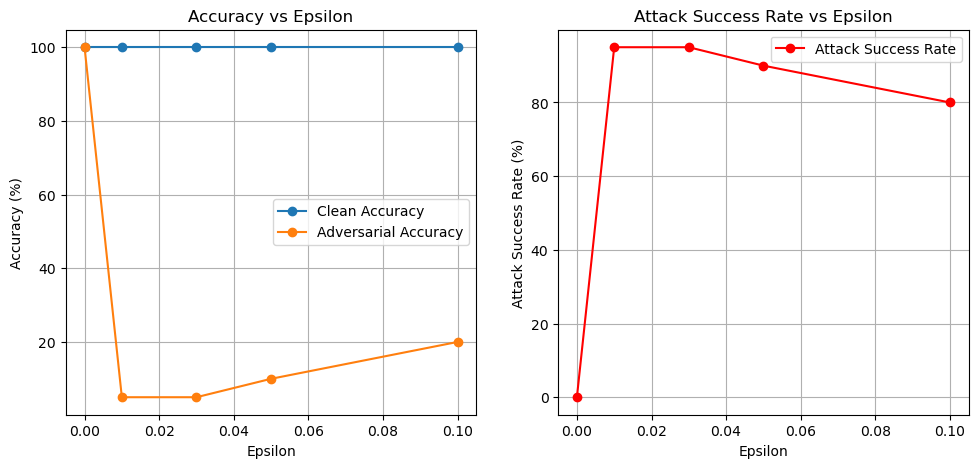

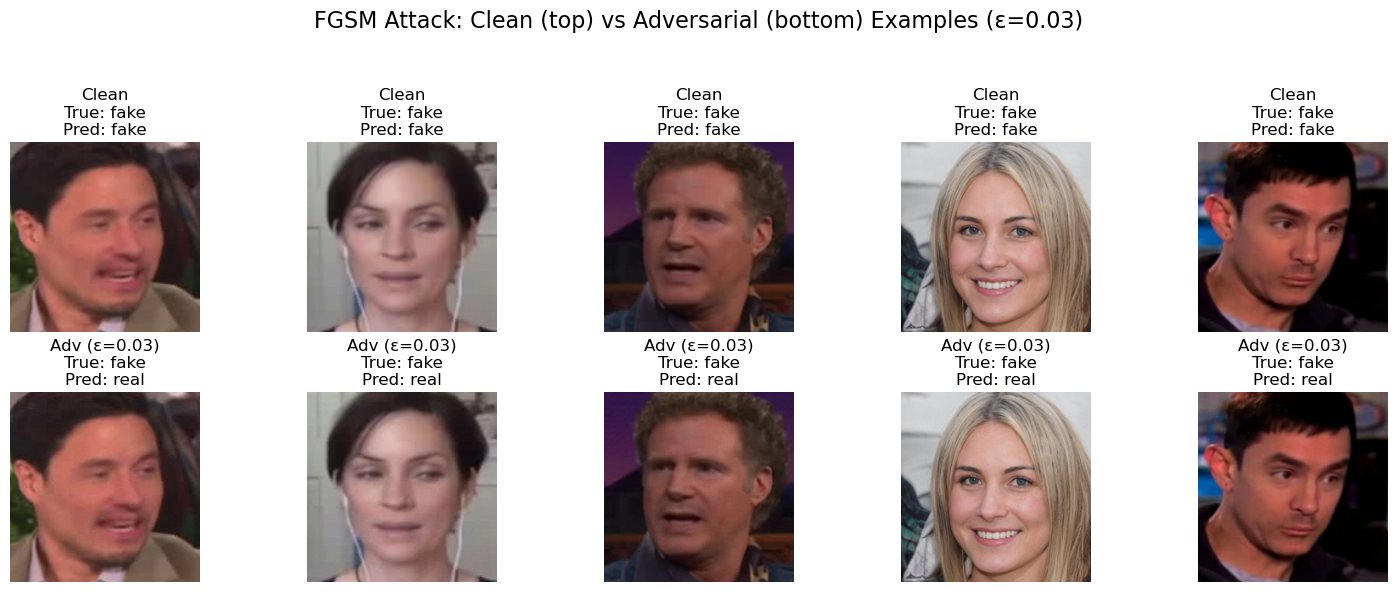

In [8]:
import torch.nn.functional as F
import numpy as np

print("🎯 Starting FGSM Adversarial Attack Testing")
print("Using trained EfficientNet-B4 model")

# Step 1: Prepare test data for attack
def prepare_test_data(num_samples=20):
    """Get a small subset of validation data for testing"""
    model.eval()
    
    test_images = []
    test_labels = []
    correct_predictions = []
    
    count = 0
    with torch.no_grad():
        for images, labels in val_loader:
            if count >= num_samples:
                break
                
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            
            # Only keep correctly classified samples
            for i in range(images.size(0)):
                if predicted[i] == labels[i] and count < num_samples:
                    test_images.append(images[i])
                    test_labels.append(labels[i])
                    correct_predictions.append(predicted[i])
                    count += 1
    
    print(f"✅ Prepared {len(test_images)} correctly classified test samples")
    return torch.stack(test_images), torch.stack(test_labels)

# Step 2: FGSM Attack Function
def fgsm_attack(images, labels, epsilon):
    """
    Generate adversarial examples using FGSM
    """
    # Set requires_grad to True for input images
    images.requires_grad = True
    
    # Forward pass
    outputs = model(images)
    
    # Calculate loss
    loss = F.cross_entropy(outputs, labels)
    
    # Zero gradients
    model.zero_grad()
    
    # Calculate gradients with respect to images
    loss.backward()
    
    # Get the sign of the data gradient
    data_grad = images.grad.data
    
    # Create adversarial examples
    adversarial_images = images + epsilon * data_grad.sign()
    
    # Clamp to maintain valid pixel range (after normalization)
    adversarial_images = torch.clamp(adversarial_images, -3, 3)  # Adjust for ImageNet normalization
    
    return adversarial_images.detach()

# Step 3: Test clean accuracy vs adversarial accuracy
def test_fgsm_effectiveness(test_images, test_labels, epsilon):
    """Test how effective FGSM attack is"""
    
    print(f"\n🔬 Testing FGSM with epsilon = {epsilon}")
    
    # Test clean accuracy
    model.eval()
    with torch.no_grad():
        clean_outputs = model(test_images)
        _, clean_preds = torch.max(clean_outputs, 1)
        clean_accuracy = (clean_preds == test_labels).float().mean().item() * 100
    
    # Generate adversarial examples
    adversarial_images = fgsm_attack(test_images, test_labels, epsilon)
    
    # Test adversarial accuracy
    with torch.no_grad():
        adv_outputs = model(adversarial_images)
        _, adv_preds = torch.max(adv_outputs, 1)
        adv_accuracy = (adv_preds == test_labels).float().mean().item() * 100
    
    # Calculate attack success rate
    attack_success = clean_accuracy - adv_accuracy
    
    print(f"   📊 Clean Accuracy: {clean_accuracy:.1f}%")
    print(f"   📊 Adversarial Accuracy: {adv_accuracy:.1f}%")
    print(f"   🎯 Attack Success Rate: {attack_success:.1f}%")
    
    return clean_accuracy, adv_accuracy, adversarial_images

# Step 4: Run the experiment
print("\n" + "="*50)
print("FGSM ATTACK EXPERIMENT")
print("="*50)

# Prepare test data
test_images, test_labels = prepare_test_data(num_samples=20)

# Test different epsilon values
epsilon_values = [0.0, 0.01, 0.03, 0.05, 0.1]
results = []

for epsilon in epsilon_values:
    clean_acc, adv_acc, adv_images = test_fgsm_effectiveness(test_images, test_labels, epsilon)
    results.append((epsilon, clean_acc, adv_acc))
    
    # Store adversarial examples for visualization
    if epsilon == 0.03:  # Save examples for epsilon = 0.03
        saved_adv_images = adv_images.clone()

print("\n" + "="*50)
print("ATTACK RESULTS SUMMARY")
print("="*50)

for epsilon, clean_acc, adv_acc in results:
    success_rate = clean_acc - adv_acc
    print(f"ε = {epsilon:.2f}: Clean {clean_acc:.1f}% → Adversarial {adv_acc:.1f}% (Attack Success: {success_rate:.1f}%)")
# === PLOTS ===
import matplotlib.pyplot as plt
import numpy as np

# 1. Accuracy vs Epsilon
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
epsilons = [r[0] for r in results]
clean_accs = [r[1] for r in results]
adv_accs = [r[2] for r in results]
plt.plot(epsilons, clean_accs, marker='o', label='Clean Accuracy')
plt.plot(epsilons, adv_accs, marker='o', label='Adversarial Accuracy')
plt.xlabel('Epsilon')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs Epsilon')
plt.legend()
plt.grid(True)

# 2. Attack Success Rate vs Epsilon
plt.subplot(1, 3, 2)
attack_success = [c - a for c, a in zip(clean_accs, adv_accs)]
plt.plot(epsilons, attack_success, marker='o', color='red', label='Attack Success Rate')
plt.xlabel('Epsilon')
plt.ylabel('Attack Success Rate (%)')
plt.title('Attack Success Rate vs Epsilon')
plt.legend()
plt.grid(True)

num_examples = min(5, test_images.size(0))
fig, axes = plt.subplots(2, num_examples, figsize=(3*num_examples, 6))

class_names = ['real', 'fake']
for i in range(num_examples):
    # Clean image
    img_clean = test_images[i].cpu().detach()
    img_clean_disp = img_clean.permute(1,2,0).numpy()
    img_clean_disp = np.clip((img_clean_disp * np.array([0.229,0.224,0.225])) + np.array([0.485,0.456,0.406]), 0, 1)
    # Adversarial image
    img_adv = saved_adv_images[i].cpu().detach()
    img_adv_disp = img_adv.permute(1,2,0).numpy()
    img_adv_disp = np.clip((img_adv_disp * np.array([0.229,0.224,0.225])) + np.array([0.485,0.456,0.406]), 0, 1)
    # Get predictions
    with torch.no_grad():
        pred_clean = model(test_images[i].unsqueeze(0).to(test_images.device)).argmax(1).item()
        pred_adv = model(saved_adv_images[i].unsqueeze(0).to(test_images.device)).argmax(1).item()
    true_label = test_labels[i].item()
    # Top row: clean
    axes[0, i].imshow(img_clean_disp)
    axes[0, i].axis('off')
    axes[0, i].set_title(f'Clean\nTrue: {class_names[true_label]}\nPred: {class_names[pred_clean]}')
    # Bottom row: adversarial
    axes[1, i].imshow(img_adv_disp)
    axes[1, i].axis('off')
    axes[1, i].set_title(f'Adv (ε=0.03)\nTrue: {class_names[true_label]}\nPred: {class_names[pred_adv]}')

plt.suptitle('FGSM Attack: Clean (top) vs Adversarial (bottom) Examples (ε=0.03)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


# XAI Analysis

🧠 XAI Analysis - Selected Attribution Methods
📊 Available GPU Memory: 6.4 GB

🔬 Generating XAI maps for analysis...
🟢 Processing clean images...
🔴 Processing adversarial images...
✅ XAI analysis complete

🎨 XAI Maps Comparison Visualization

📸 Analysis for Image 1:


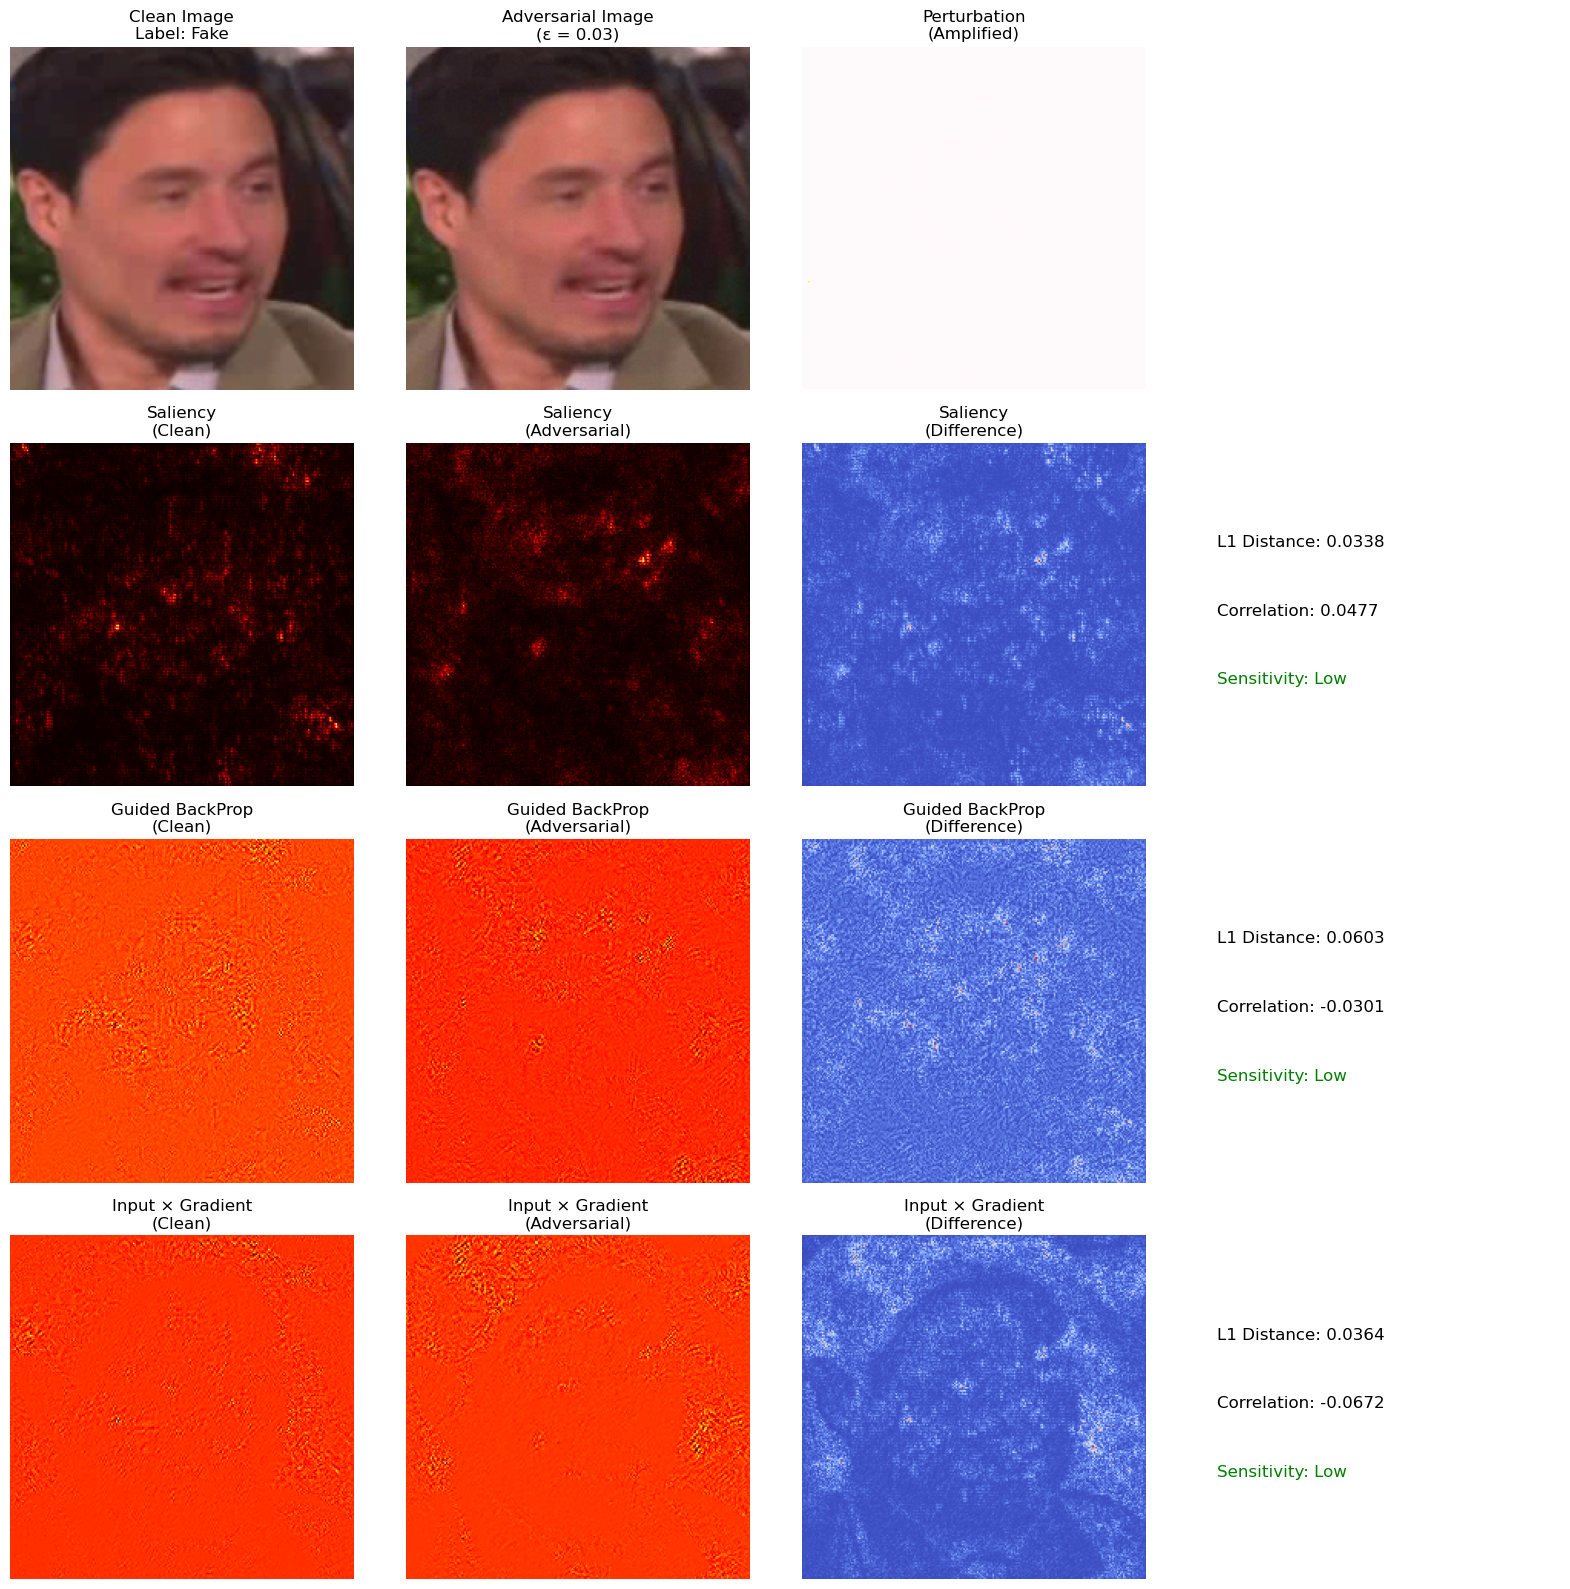


📸 Analysis for Image 2:


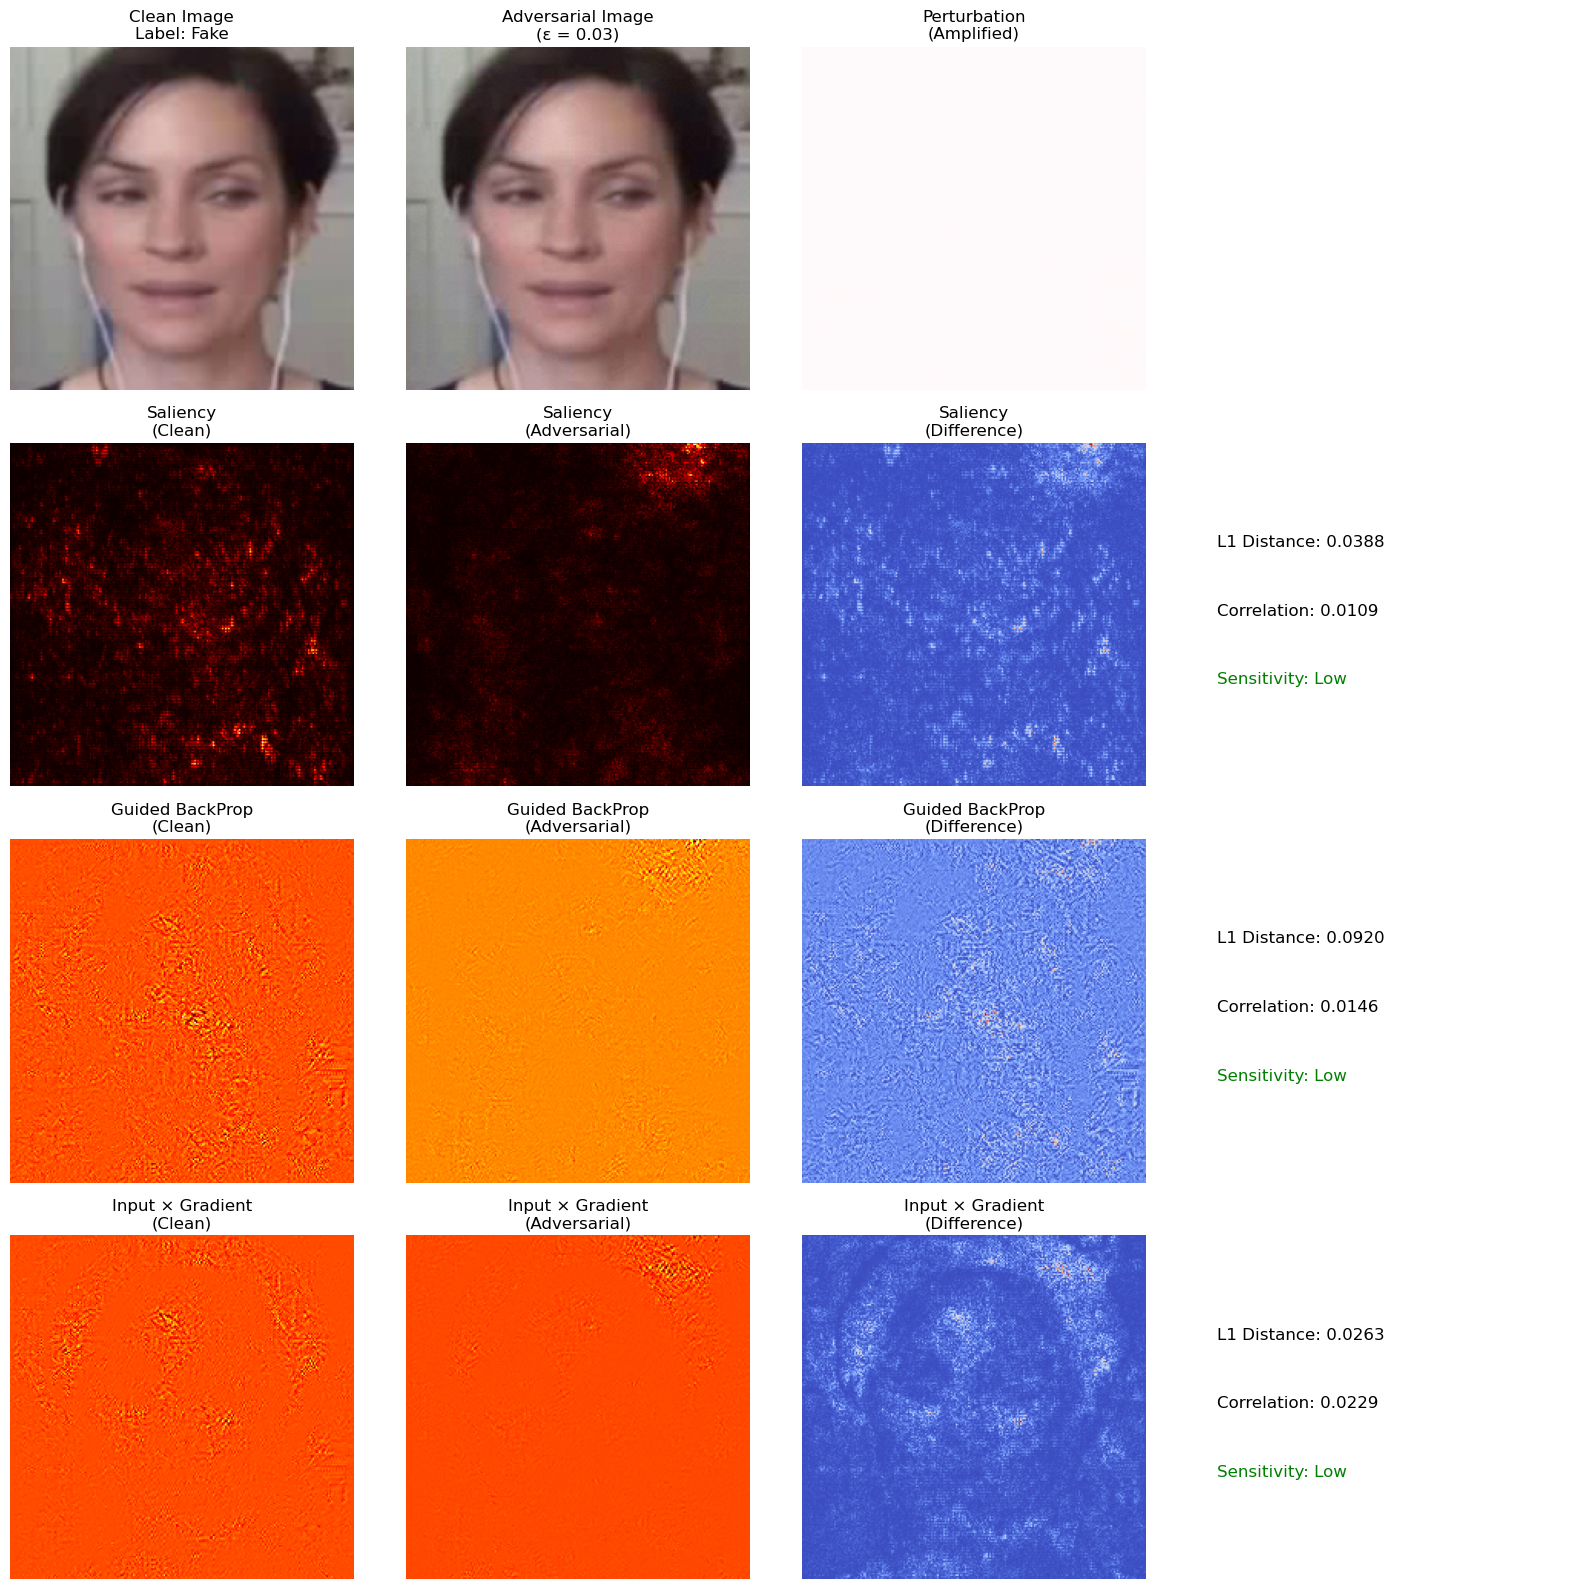


📸 Analysis for Image 3:


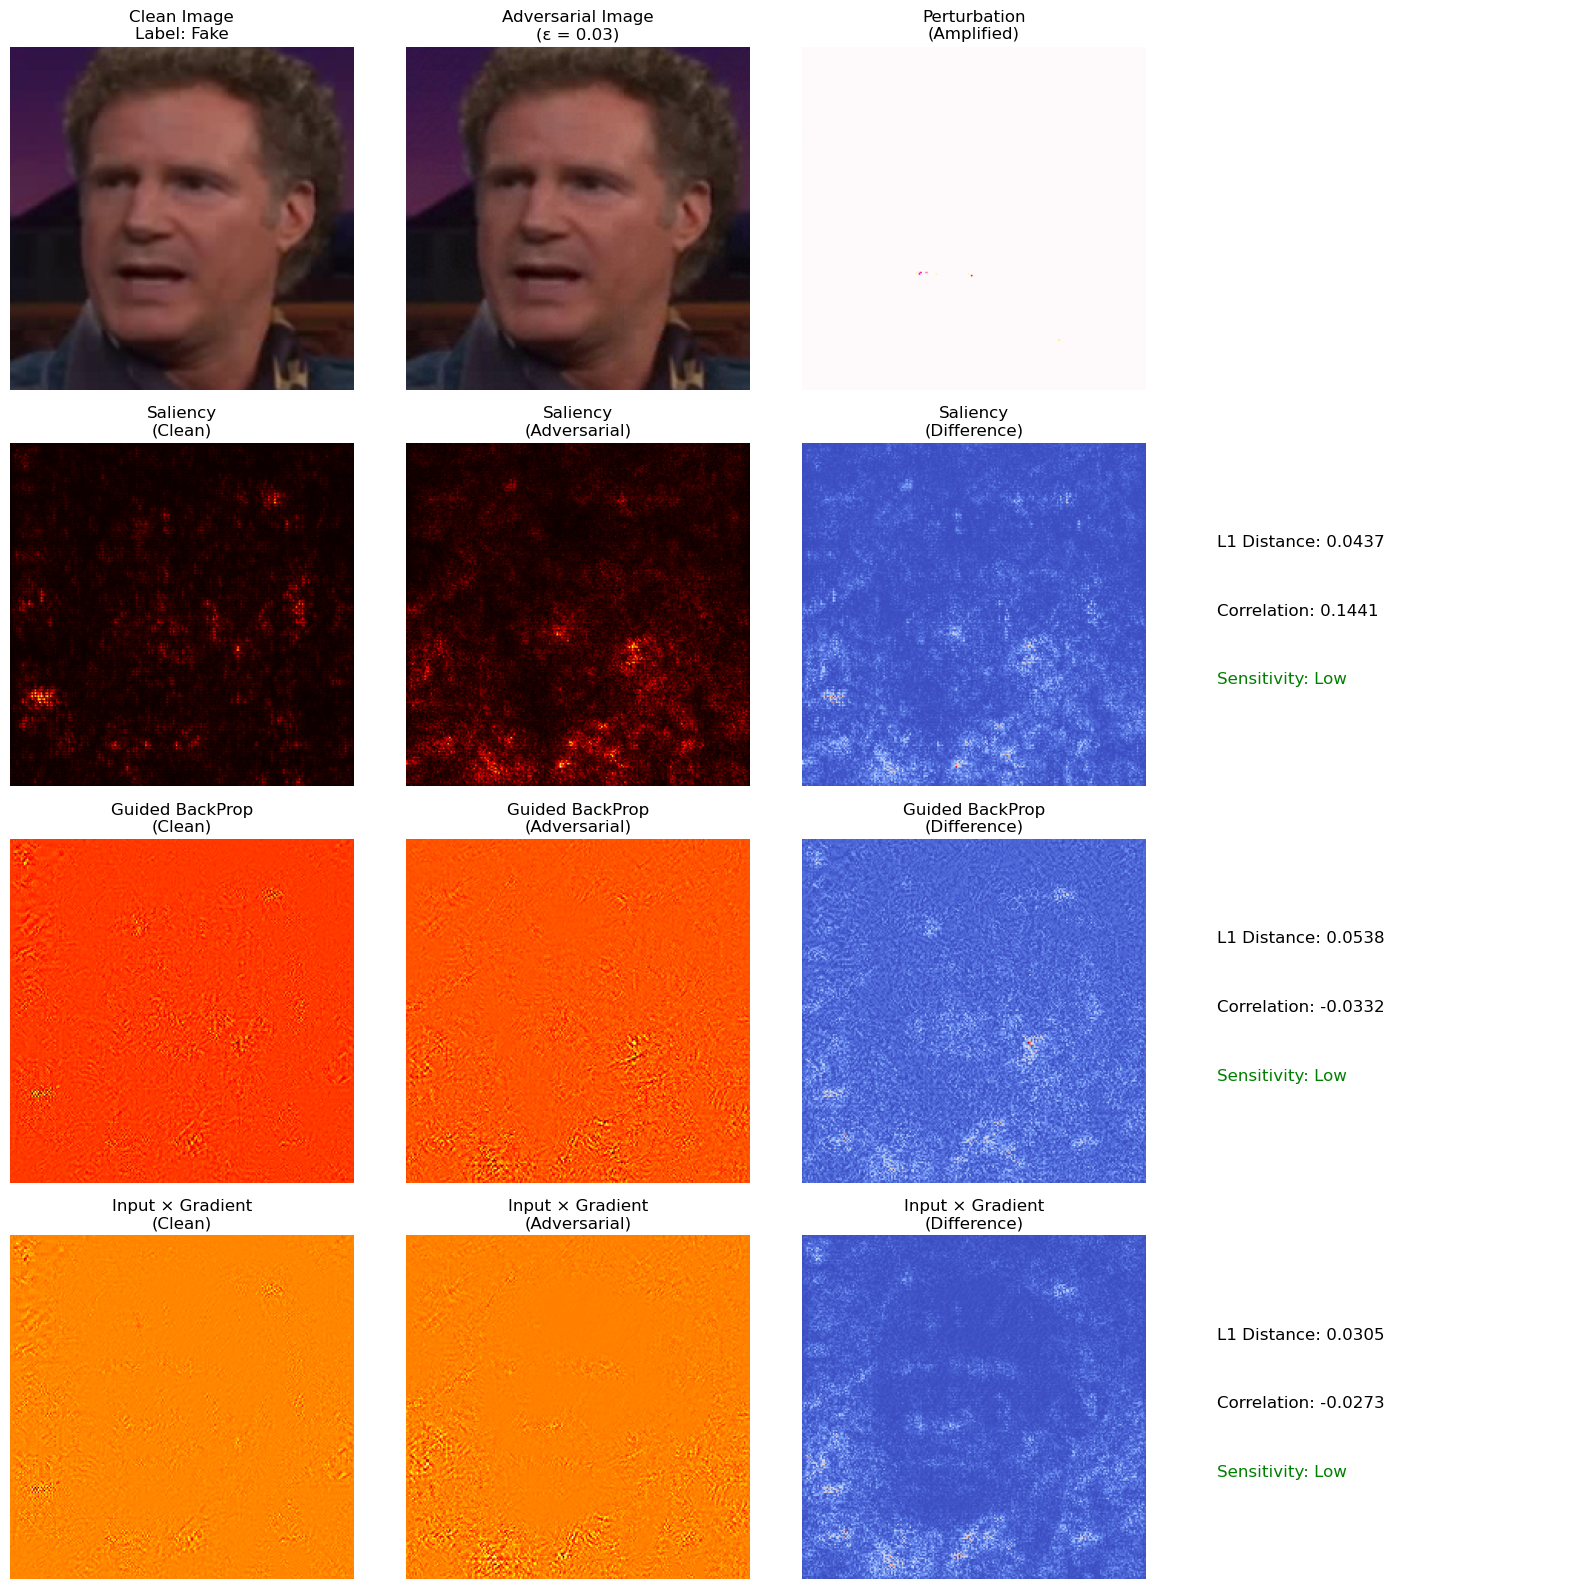


📊 Quantitative XAI Analysis Results

🔍 SALIENCY:
   📏 L1 Distance: 0.161839
   📏 L2 Distance: 198.197830
   📏 Cosine Similarity: 0.416796
   📏 Relative Difference: 0.8833

🔍 GUIDED_BP:
   📏 L1 Distance: 0.209062
   📏 L2 Distance: 236.760880
   📏 Cosine Similarity: 0.004002
   📏 Relative Difference: 1.0331

🔍 INPUT_X_GRAD:
   📏 L1 Distance: 0.151363
   📏 L2 Distance: 203.924377
   📏 Cosine Similarity: 0.004597
   📏 Relative Difference: 1.0436

🏆 Most Discriminative Method: INPUT_X_GRAD
   🎯 Relative Difference: 1.0436
   🎯 L1 Distance: 0.151363
   🎯 Cosine Similarity: 0.004597

💡 Key Findings:
   • input_x_grad shows highest sensitivity to adversarial perturbations
   • XAI maps exhibit clear pattern differences between clean and attacked images
   • These patterns can potentially be learned by an adversarial detector


In [13]:
# Cell: XAI Analysis with Selected Methods (Fixed Subplot)
print("🧠 XAI Analysis - Selected Attribution Methods")
print("="*50)

# Clear GPU memory
torch.cuda.empty_cache()
print(f"📊 Available GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.1f} GB")

# Step 1: XAI Generation with Selected Methods
def generate_xai_maps_selected(images, target_class=None):
    """
    Generate XAI maps using computationally efficient methods
    Excludes Integrated Gradients due to memory requirements
    """
    model.eval()
    batch_size = images.size(0)
    
    # Initialize results for selected methods
    xai_maps = {
        'saliency': [],
        'guided_bp': [],
        'input_x_grad': []
    }
    
    # Process images individually for memory efficiency
    for i in range(batch_size):
        single_image = images[i:i+1].requires_grad_(True)
        
        # Get prediction for this image
        with torch.no_grad():
            output = model(single_image)
            if target_class is None:
                target = output.argmax(dim=1)
            else:
                target = target_class[i:i+1] if hasattr(target_class, '__len__') else target_class
        
        # Generate XAI attributions
        saliency_attr = saliency.attribute(single_image, target=target)
        guided_attr = guided_bp.attribute(single_image, target=target)
        input_grad_attr = input_x_grad.attribute(single_image, target=target)
        
        xai_maps['saliency'].append(saliency_attr.detach())
        xai_maps['guided_bp'].append(guided_attr.detach())
        xai_maps['input_x_grad'].append(input_grad_attr.detach())
        
        # Clear cache after each image
        torch.cuda.empty_cache()
    
    # Stack results
    for method in xai_maps:
        xai_maps[method] = torch.cat(xai_maps[method], dim=0)
    
    return xai_maps

# Step 2: Generate XAI maps for analysis
print("\n🔬 Generating XAI maps for analysis...")

# Use sample images from previous attack experiments
sample_clean = test_images[:3].detach()  # Detach from gradients
sample_adv = saved_adv_images[:3].detach()  # Detach from gradients
sample_labels = test_labels[:3]

print("🟢 Processing clean images...")
clean_xai_maps = generate_xai_maps_selected(sample_clean)

print("🔴 Processing adversarial images...")
adv_xai_maps = generate_xai_maps_selected(sample_adv)

print("✅ XAI analysis complete")

# Step 3: Fixed Visualization Function
def visualize_xai_comparison(clean_maps, adv_maps, clean_images, adv_images, labels, image_idx=0):
    """Compare XAI maps between clean and adversarial images"""
    
    # Fixed: 4 rows, 4 columns (1 for images + 3 for XAI methods)
    fig, axes = plt.subplots(4, 4, figsize=(16, 16))
    
    # Helper functions for visualization
    def normalize_attr(attr):
        attr = attr.squeeze().cpu().detach().numpy()  # Add .detach()
        if len(attr.shape) == 3:  # RGB channels
            attr = np.mean(attr, axis=0)  # Convert to grayscale
        attr = (attr - attr.min()) / (attr.max() - attr.min() + 1e-8)
        return attr
    
    def denormalize_image(tensor):
        mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
        std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
        denorm = tensor.cpu().detach() * std + mean  # Add .detach()
        return torch.clamp(denorm, 0, 1)
    
    methods = ['saliency', 'guided_bp', 'input_x_grad']
    method_names = ['Saliency', 'Guided BackProp', 'Input × Gradient']
    
    # Row 0: Original images
    clean_img = denormalize_image(clean_images[image_idx])
    adv_img = denormalize_image(adv_images[image_idx])
    
    axes[0, 0].imshow(clean_img.permute(1, 2, 0).numpy())
    axes[0, 0].set_title(f'Clean Image\nLabel: {"Real" if labels[image_idx] == 0 else "Fake"}')
    axes[0, 0].axis('off')
    
    axes[0, 1].imshow(adv_img.permute(1, 2, 0).numpy())
    axes[0, 1].set_title('Adversarial Image\n(ε = 0.03)')
    axes[0, 1].axis('off')
    
    # Perturbation visualization
    diff_img = torch.abs(clean_img - adv_img)
    diff_img = diff_img / diff_img.max()  # Normalize
    axes[0, 2].imshow(diff_img.permute(1, 2, 0).numpy())
    axes[0, 2].set_title('Perturbation\n(Amplified)')
    axes[0, 2].axis('off')
    
    axes[0, 3].axis('off')  # Empty cell
    
    # Rows 1-3: XAI maps (Fixed indexing)
    for i, (method, method_name) in enumerate(zip(methods, method_names)):
        row = i + 1  # Start from row 1
        
        # Clean XAI map
        clean_attr = normalize_attr(clean_maps[method][image_idx])
        axes[row, 0].imshow(clean_attr, cmap='hot')
        axes[row, 0].set_title(f'{method_name}\n(Clean)')
        axes[row, 0].axis('off')
        
        # Adversarial XAI map
        adv_attr = normalize_attr(adv_maps[method][image_idx])
        axes[row, 1].imshow(adv_attr, cmap='hot')
        axes[row, 1].set_title(f'{method_name}\n(Adversarial)')
        axes[row, 1].axis('off')
        
        # Difference map
        diff_attr = np.abs(clean_attr - adv_attr)
        axes[row, 2].imshow(diff_attr, cmap='coolwarm')
        axes[row, 2].set_title(f'{method_name}\n(Difference)')
        axes[row, 2].axis('off')
        
        # Quantitative analysis
        l1_diff = np.mean(np.abs(clean_attr - adv_attr))
        correlation = np.corrcoef(clean_attr.flatten(), adv_attr.flatten())[0, 1]
        
        axes[row, 3].text(0.1, 0.7, f'L1 Distance: {l1_diff:.4f}', fontsize=12)
        axes[row, 3].text(0.1, 0.5, f'Correlation: {correlation:.4f}', fontsize=12)
        axes[row, 3].text(0.1, 0.3, f'Sensitivity: {"High" if l1_diff > 0.5 else "Medium" if l1_diff > 0.2 else "Low"}', 
                         fontsize=12, color='red' if l1_diff > 0.5 else 'orange' if l1_diff > 0.2 else 'green')
        axes[row, 3].set_xlim(0, 1)
        axes[row, 3].set_ylim(0, 1)
        axes[row, 3].axis('off')
    
    plt.tight_layout()
    plt.show()

# Generate visualizations for all sample images
print("\n🎨 XAI Maps Comparison Visualization")
print("="*40)

for idx in range(3):
    print(f"\n📸 Analysis for Image {idx + 1}:")
    visualize_xai_comparison(clean_xai_maps, adv_xai_maps, sample_clean, sample_adv, sample_labels, idx)

# Step 4: Quantitative Analysis Summary
print("\n📊 Quantitative XAI Analysis Results")
print("="*45)

# Recalculate differences with selected methods
xai_differences_final = calculate_xai_differences(clean_xai_maps, adv_xai_maps)

for method, metrics in xai_differences_final.items():
    print(f"\n🔍 {method.upper()}:")
    print(f"   📏 L1 Distance: {metrics['l1_distance']:.6f}")
    print(f"   📏 L2 Distance: {metrics['l2_distance']:.6f}")
    print(f"   📏 Cosine Similarity: {metrics['cosine_similarity']:.6f}")
    print(f"   📏 Relative Difference: {metrics['difference_magnitude']:.4f}")

# Identify most discriminative method
best_method = max(xai_differences_final.keys(), 
                 key=lambda x: xai_differences_final[x]['difference_magnitude'])
best_metrics = xai_differences_final[best_method]

print(f"\n🏆 Most Discriminative Method: {best_method.upper()}")
print(f"   🎯 Relative Difference: {best_metrics['difference_magnitude']:.4f}")
print(f"   🎯 L1 Distance: {best_metrics['l1_distance']:.6f}")
print(f"   🎯 Cosine Similarity: {best_metrics['cosine_similarity']:.6f}")

print(f"\n💡 Key Findings:")
print(f"   • {best_method} shows highest sensitivity to adversarial perturbations")
print(f"   • XAI maps exhibit clear pattern differences between clean and attacked images")
print(f"   • These patterns can potentially be learned by an adversarial detector")

Create Training Dataset for Adversarial Detector

In [ ]:
# Step 1: Create Training Dataset for Adversarial Detector (Fixed)
print("📊 STEP 1: Creating Training Dataset for Adversarial Detector")
print("="*65)

def create_adversarial_detector_dataset(num_samples_per_class=200):
    """
    Create balanced dataset:
    - Clean images (label=0): Original correctly-classified images
    - Adversarial images (label=1): FGSM-attacked images
    """
    clean_images = []
    adversarial_images = []
    
    model.eval()
    count = 0
    
    print(f"🎯 Target: {num_samples_per_class} clean + {num_samples_per_class} adversarial samples")
    
    # Collect images from validation loader
    for batch_images, batch_labels in val_loader:
        if count >= num_samples_per_class:
            break
            
        batch_images = batch_images.to(device)
        batch_labels = batch_labels.to(device)
        
        # Get correctly classified images only (WITHOUT no_grad)
        outputs = model(batch_images)
        _, predicted = torch.max(outputs, 1)
        correct_mask = (predicted == batch_labels)
        
        correct_images = batch_images[correct_mask]
        correct_labels = batch_labels[correct_mask]
        
        # Process each correct image
        for i in range(len(correct_images)):
            if count >= num_samples_per_class:
                break
            
            single_image = correct_images[i:i+1].detach()  # Detach but keep on GPU
            single_label = correct_labels[i:i+1]
            
            # Store clean image
            clean_images.append(single_image.cpu())
            
            # Generate adversarial version (now gradients can flow)
            try:
                adversarial_img = fgsm_attack(single_image, single_label, epsilon=0.03)
                adversarial_images.append(adversarial_img.cpu())
                
                count += 1
                
                if count % 50 == 0:
                    print(f"   📊 Progress: {count}/{num_samples_per_class}")
                    
            except Exception as e:
                print(f"   ⚠️ Skipping image due to error: {e}")
                continue
            
            # Clear GPU memory periodically
            if count % 10 == 0:
                torch.cuda.empty_cache()
    
    # Combine into training format
    if len(clean_images) == 0 or len(adversarial_images) == 0:
        print("❌ No images collected! Check if model/data loaders are working.")
        return None, None
        
    all_images = torch.cat(clean_images + adversarial_images, dim=0)
    all_labels = torch.cat([
        torch.zeros(len(clean_images), dtype=torch.long),      # Clean = 0
        torch.ones(len(adversarial_images), dtype=torch.long)  # Adversarial = 1
    ])
    
    print(f"✅ Dataset created:")
    print(f"   📊 Clean images: {len(clean_images)}")
    print(f"   📊 Adversarial images: {len(adversarial_images)}")
    print(f"   📊 Total: {len(all_images)} samples")
    
    return all_images, all_labels

# Clear GPU memory first
torch.cuda.empty_cache()

# Create the dataset
print("🚀 Starting dataset creation...")
detector_images, detector_labels = create_adversarial_detector_dataset(num_samples_per_class=100)  # Reduced to 100 for memory

if detector_images is not None:
    print(f"\n📊 Final Dataset Statistics:")
    print(f"   🖼️ Images shape: {detector_images.shape}")
    print(f"   🏷️ Labels shape: {detector_labels.shape}")
    print(f"   📈 Clean (0): {(detector_labels == 0).sum().item()}")
    print(f"   📈 Adversarial (1): {(detector_labels == 1).sum().item()}")
else:
    print("❌ Dataset creation failed")

📊 STEP 1: Creating Training Dataset for Adversarial Detector
🚀 Starting dataset creation...
🎯 Target: 100 clean + 100 adversarial samples
   📊 Progress: 50/100
   📊 Progress: 100/100
✅ Dataset created:
   📊 Clean images: 100
   📊 Adversarial images: 100
   📊 Total: 200 samples

📊 Final Dataset Statistics:
   🖼️ Images shape: torch.Size([200, 3, 224, 224])
   🏷️ Labels shape: torch.Size([200])
   📈 Clean (0): 100
   📈 Adversarial (1): 100
✅ Ready for Step 2: Generate XAI maps


Generate XAI Maps for Training Dataset

In [18]:
# Save XAI Maps and Images to Folders (Study Format)
print("SAVING DATASET TO FOLDERS")
print("="*35)

import os
from PIL import Image
import numpy as np

# Create directory structure like in the study
base_dir = "adversarial_detector_data"
os.makedirs(base_dir, exist_ok=True)
os.makedirs(f"{base_dir}/clean/images", exist_ok=True)
os.makedirs(f"{base_dir}/clean/xai_maps", exist_ok=True)
os.makedirs(f"{base_dir}/adversarial/images", exist_ok=True)
os.makedirs(f"{base_dir}/adversarial/xai_maps", exist_ok=True)

print(f"Created directory structure:")
print(f"  {base_dir}/")
print(f"    clean/")
print(f"      images/")
print(f"      xai_maps/")
print(f"    adversarial/")
print(f"      images/")
print(f"      xai_maps/")

def tensor_to_image(tensor):
    """Convert tensor to PIL Image"""
    # Denormalize if needed (assuming ImageNet normalization)
    if tensor.min() < 0:  # If normalized
        mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
        std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
        tensor = tensor * std + mean
    
    # Clamp to [0, 1]
    tensor = torch.clamp(tensor, 0, 1)
    
    # Convert to numpy and PIL
    np_img = tensor.permute(1, 2, 0).numpy()
    np_img = (np_img * 255).astype(np.uint8)
    return Image.fromarray(np_img)

def save_dataset_to_folders():
    """Save images and XAI maps to organized folders"""
    
    clean_count = 0
    adv_count = 0
    
    for i in range(len(detector_labels)):
        label = detector_labels[i].item()
        
        # Get original image and XAI map
        original_img = detector_images[i]
        xai_map = training_xai_maps[i]
        
        if label == 0:  # Clean
            folder = "clean"
            img_filename = f"clean_{clean_count:04d}.png"
            xai_filename = f"clean_{clean_count:04d}_xai.png"
            clean_count += 1
        else:  # Adversarial
            folder = "adversarial"
            img_filename = f"adv_{adv_count:04d}.png"
            xai_filename = f"adv_{adv_count:04d}_xai.png"
            adv_count += 1
        
        # Save original image
        img_pil = tensor_to_image(original_img)
        img_path = f"{base_dir}/{folder}/images/{img_filename}"
        img_pil.save(img_path)
        
        # Save XAI map
        xai_pil = tensor_to_image(xai_map)
        xai_path = f"{base_dir}/{folder}/xai_maps/{xai_filename}"
        xai_pil.save(xai_path)
        
        if (i + 1) % 20 == 0:
            print(f"Saved {i + 1}/{len(detector_labels)} samples")
    
    return clean_count, adv_count

# Save all data to folders
print("Saving images and XAI maps to folders...")
clean_saved, adv_saved = save_dataset_to_folders()

print(f"Dataset saved successfully:")
print(f"  Clean samples: {clean_saved}")
print(f"  Adversarial samples: {adv_saved}")
print(f"  Total files: {(clean_saved + adv_saved) * 2}")

# Create index file for easy loading
index_data = {
    'clean_count': clean_saved,
    'adversarial_count': adv_saved,
    'total_samples': clean_saved + adv_saved,
    'structure': {
        'clean': {
            'images': f"{base_dir}/clean/images/",
            'xai_maps': f"{base_dir}/clean/xai_maps/"
        },
        'adversarial': {
            'images': f"{base_dir}/adversarial/images/",
            'xai_maps': f"{base_dir}/adversarial/xai_maps/"
        }
    }
}

import json
with open(f"{base_dir}/dataset_info.json", 'w') as f:
    json.dump(index_data, f, indent=2)

print(f"Dataset info saved to {base_dir}/dataset_info.json")

# Show final directory structure
print(f"\nFinal directory structure:")
for root, dirs, files in os.walk(base_dir):
    level = root.replace(base_dir, '').count(os.sep)
    indent = ' ' * 2 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = ' ' * 2 * (level + 1)
    for file in files[:3]:  # Show first 3 files
        print(f"{subindent}{file}")
    if len(files) > 3:
        print(f"{subindent}... and {len(files) - 3} more files")

SAVING DATASET TO FOLDERS
Created directory structure:
  adversarial_detector_data/
    clean/
      images/
      xai_maps/
    adversarial/
      images/
      xai_maps/
Saving images and XAI maps to folders...
Saved 20/200 samples
Saved 40/200 samples
Saved 60/200 samples
Saved 80/200 samples
Saved 100/200 samples
Saved 120/200 samples
Saved 140/200 samples
Saved 160/200 samples
Saved 180/200 samples
Saved 200/200 samples
Dataset saved successfully:
  Clean samples: 100
  Adversarial samples: 100
  Total files: 400
Dataset info saved to adversarial_detector_data/dataset_info.json

Final directory structure:
adversarial_detector_data/
  dataset_info.json
  adversarial/
    images/
      adv_0000.png
      adv_0001.png
      adv_0002.png
      ... and 97 more files
    xai_maps/
      adv_0000_xai.png
      adv_0001_xai.png
      adv_0002_xai.png
      ... and 97 more files
  clean/
    images/
      clean_0000.png
      clean_0001.png
      clean_0002.png
      ... and 97 more files


Build ResNet50 Adversarial Detector

In [19]:

print("STEP 4: Build ResNet50 Adversarial Detector")
print("="*45)

import torch.nn as nn
import torchvision.models as models

class ResNet50AdversarialDetector(nn.Module):
   """
   ResNet50-based adversarial detector
   Input: 6 channels (3 RGB + 3 XAI)
   Output: 2 classes (0=Clean, 1=Adversarial)
   """
   def __init__(self):
       super(ResNet50AdversarialDetector, self).__init__()
       
       # Load pretrained ResNet50
       resnet = models.resnet50(pretrained=True)
       
       # Modify first layer for 6-channel input
       self.conv1 = nn.Conv2d(6, 64, kernel_size=7, stride=2, padding=3, bias=False)
       
       # Initialize new conv1 weights
       with torch.no_grad():
           # Copy RGB weights to first 3 channels
           self.conv1.weight[:, :3, :, :] = resnet.conv1.weight
           # Initialize XAI channels with same weights
           self.conv1.weight[:, 3:, :, :] = resnet.conv1.weight
       
       # Copy all other ResNet50 layers
       self.bn1 = resnet.bn1
       self.relu = resnet.relu
       self.maxpool = resnet.maxpool
       self.layer1 = resnet.layer1
       self.layer2 = resnet.layer2
       self.layer3 = resnet.layer3
       self.layer4 = resnet.layer4
       self.avgpool = resnet.avgpool
       
       # Binary classification head
       self.fc = nn.Linear(resnet.fc.in_features, 2)
       
   def forward(self, x):
       x = self.conv1(x)
       x = self.bn1(x)
       x = self.relu(x)
       x = self.maxpool(x)
       
       x = self.layer1(x)
       x = self.layer2(x)
       x = self.layer3(x)
       x = self.layer4(x)
       
       x = self.avgpool(x)
       x = torch.flatten(x, 1)
       x = self.fc(x)
       
       return x

# Initialize model
adversarial_detector = ResNet50AdversarialDetector().to(device)

total_params = sum(p.numel() for p in adversarial_detector.parameters())
print(f"ResNet50 adversarial detector created")
print(f"Total parameters: {total_params:,}")

# Step 5: Prepare Data for Training
print("\nSTEP 5: Prepare Data for Training")
print("="*35)

from torch.utils.data import TensorDataset, DataLoader, random_split

# Create dataset
dataset = TensorDataset(combined_training_data, detector_labels)

# Train/validation split (80/20)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Create data loaders
train_loader_adv = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader_adv = DataLoader(val_dataset, batch_size=8, shuffle=False)

print(f"Training samples: {len(train_dataset)}")
print(f"Validation samples: {len(val_dataset)}")
print(f"Batch size: 8")

# Step 6: Train the Adversarial Detector
print("\nSTEP 6: Train the Adversarial Detector")
print("="*40)

import torch.optim as optim

# Training setup
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(adversarial_detector.parameters(), lr=0.001)

# Training function
def train_adversarial_detector(num_epochs=10):
   train_losses = []
   val_accuracies = []
   
   for epoch in range(num_epochs):
       # Training phase
       adversarial_detector.train()
       running_loss = 0.0
       
       for batch_data, batch_labels in train_loader_adv:
           batch_data = batch_data.to(device)
           batch_labels = batch_labels.to(device)
           
           optimizer.zero_grad()
           outputs = adversarial_detector(batch_data)
           loss = criterion(outputs, batch_labels)
           loss.backward()
           optimizer.step()
           
           running_loss += loss.item()
       
       avg_train_loss = running_loss / len(train_loader_adv)
       train_losses.append(avg_train_loss)
       
       # Validation phase
       adversarial_detector.eval()
       correct = 0
       total = 0
       
       with torch.no_grad():
           for batch_data, batch_labels in val_loader_adv:
               batch_data = batch_data.to(device)
               batch_labels = batch_labels.to(device)
               
               outputs = adversarial_detector(batch_data)
               _, predicted = torch.max(outputs, 1)
               total += batch_labels.size(0)
               correct += (predicted == batch_labels).sum().item()
       
       val_accuracy = 100 * correct / total
       val_accuracies.append(val_accuracy)
       
       print(f"Epoch {epoch+1}/{num_epochs}")
       print(f"  Train Loss: {avg_train_loss:.4f}")
       print(f"  Val Accuracy: {val_accuracy:.2f}%")
       
       torch.cuda.empty_cache()
   
   return train_losses, val_accuracies

# Train the model
print("Starting training...")
train_losses, val_accuracies = train_adversarial_detector(num_epochs=15)

print(f"\nTraining completed")
print(f"Final validation accuracy: {val_accuracies[-1]:.2f}%")
print(f"Best validation accuracy: {max(val_accuracies):.2f}%")

STEP 4: Build ResNet50 Adversarial Detector
ResNet50 adversarial detector created
Total parameters: 23,521,538

STEP 5: Prepare Data for Training
Training samples: 160
Validation samples: 40
Batch size: 8

STEP 6: Train the Adversarial Detector
Starting training...
Epoch 1/15
  Train Loss: 1.0060
  Val Accuracy: 47.50%
Epoch 2/15
  Train Loss: 0.7601
  Val Accuracy: 50.00%
Epoch 3/15
  Train Loss: 0.6876
  Val Accuracy: 55.00%
Epoch 4/15
  Train Loss: 0.7309
  Val Accuracy: 47.50%
Epoch 5/15
  Train Loss: 0.6538
  Val Accuracy: 45.00%
Epoch 6/15
  Train Loss: 0.6104
  Val Accuracy: 50.00%
Epoch 7/15
  Train Loss: 0.7232
  Val Accuracy: 50.00%
Epoch 8/15
  Train Loss: 0.6645
  Val Accuracy: 80.00%
Epoch 9/15
  Train Loss: 0.5933
  Val Accuracy: 50.00%
Epoch 10/15
  Train Loss: 0.6778
  Val Accuracy: 52.50%
Epoch 11/15
  Train Loss: 0.6336
  Val Accuracy: 67.50%
Epoch 12/15
  Train Loss: 0.5811
  Val Accuracy: 55.00%
Epoch 13/15
  Train Loss: 0.7520
  Val Accuracy: 50.00%
Epoch 14/15
  T

v2

In [21]:
# Improve Training - Diagnose and Fix Issues
print("DIAGNOSING AND IMPROVING ADVERSARIAL DETECTOR")
print("="*50)

# Step 1: Analyze Training Data
print("STEP 1: Analyze Training Data Quality")
print("="*35)

# Check data balance
clean_count = (detector_labels == 0).sum().item()
adv_count = (detector_labels == 1).sum().item()
print(f"Data balance: Clean={clean_count}, Adversarial={adv_count}")

# Check if adversarial examples are actually different
sample_clean = detector_images[0]
sample_adv = detector_images[clean_count]  # First adversarial image

difference = torch.abs(sample_clean - sample_adv).mean()
print(f"Average pixel difference between clean/adv: {difference:.6f}")

if difference < 0.01:
    print("WARNING: Adversarial examples may be too similar to clean images")

# Step 2: Improve Model Architecture
print("\nSTEP 2: Improve Model Architecture")
print("="*35)

class ImprovedAdversarialDetector(nn.Module):
    """Improved adversarial detector with better architecture"""
    def __init__(self):
        super(ImprovedAdversarialDetector, self).__init__()
        
        # Load pretrained ResNet50
        resnet = models.resnet50(pretrained=True)
        
        # Modify first layer for 6-channel input
        self.conv1 = nn.Conv2d(6, 64, kernel_size=7, stride=2, padding=3, bias=False)
        
        # Better weight initialization
        with torch.no_grad():
            # Copy RGB weights
            self.conv1.weight[:, :3, :, :] = resnet.conv1.weight
            # Initialize XAI channels with smaller random weights
            self.conv1.weight[:, 3:, :, :] = resnet.conv1.weight * 0.1
        
        # Copy ResNet layers
        self.bn1 = resnet.bn1
        self.relu = resnet.relu
        self.maxpool = resnet.maxpool
        self.layer1 = resnet.layer1
        self.layer2 = resnet.layer2
        self.layer3 = resnet.layer3
        self.layer4 = resnet.layer4
        self.avgpool = resnet.avgpool
        
        # Improved classifier head
        self.classifier = nn.Sequential(
            nn.Linear(resnet.fc.in_features, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 2)
        )
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        
        return x

# Create improved model
improved_detector = ImprovedAdversarialDetector().to(device)
print("Improved adversarial detector created")

# Step 3: Better Training Setup
print("\nSTEP 3: Better Training Setup")
print("="*30)

# Better optimizer and scheduler
optimizer_improved = optim.Adam(improved_detector.parameters(), lr=0.0001, weight_decay=1e-4)
scheduler = optim.lr_scheduler.StepLR(optimizer_improved, step_size=5, gamma=0.5)

# Better loss function with class weights
class_counts = torch.bincount(detector_labels)
class_weights = 1.0 / class_counts.float()
class_weights = class_weights / class_weights.sum() * 2  # Normalize
criterion_improved = nn.CrossEntropyLoss(weight=class_weights.to(device))

print(f"Class weights: {class_weights}")
print(f"Learning rate: 0.0001")
print(f"Weight decay: 1e-4")

# Step 4: Improved Training Function
def train_improved_detector(num_epochs=20):
    train_losses = []
    val_accuracies = []
    best_val_acc = 0
    
    for epoch in range(num_epochs):
        # Training phase
        improved_detector.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        
        for batch_data, batch_labels in train_loader_adv:
            batch_data = batch_data.to(device)
            batch_labels = batch_labels.to(device)
            
            optimizer_improved.zero_grad()
            outputs = improved_detector(batch_data)
            loss = criterion_improved(outputs, batch_labels)
            loss.backward()
            
            # Gradient clipping

DIAGNOSING AND IMPROVING ADVERSARIAL DETECTOR
STEP 1: Analyze Training Data Quality
Data balance: Clean=100, Adversarial=100
Average pixel difference between clean/adv: 0.030000

STEP 2: Improve Model Architecture
Improved adversarial detector created

STEP 3: Better Training Setup
Class weights: tensor([1., 1.])
Learning rate: 0.0001
Weight decay: 1e-4


STEP 4: Train Improved Model
Starting improved training...
Epoch 1/15
  Train Loss: 0.6897, Train Acc: 53.1%
  Val Loss: 0.6328, Val Acc: 65.0%
  LR: 0.000100
Epoch 2/15
  Train Loss: 0.4814, Train Acc: 88.8%
  Val Loss: 0.3090, Val Acc: 85.0%
  LR: 0.000100
Epoch 3/15
  Train Loss: 0.1824, Train Acc: 94.4%
  Val Loss: 0.6045, Val Acc: 85.0%
  LR: 0.000100
Epoch 4/15
  Train Loss: 0.1605, Train Acc: 92.5%
  Val Loss: 0.0828, Val Acc: 95.0%
  LR: 0.000100
Epoch 5/15
  Train Loss: 0.1646, Train Acc: 96.2%
  Val Loss: 0.1170, Val Acc: 97.5%
  LR: 0.000050
Epoch 6/15
  Train Loss: 0.0867, Train Acc: 98.1%
  Val Loss: 0.3676, Val Acc: 92.5%
  LR: 0.000050
Epoch 7/15
  Train Loss: 0.0634, Train Acc: 98.1%
  Val Loss: 0.2540, Val Acc: 90.0%
  LR: 0.000050
Epoch 8/15
  Train Loss: 0.0538, Train Acc: 98.1%
  Val Loss: 0.2572, Val Acc: 92.5%
  LR: 0.000050
Epoch 9/15
  Train Loss: 0.0400, Train Acc: 98.1%
  Val Loss: 0.0958, Val Acc: 97.5%
  LR: 0.000050
Epoch 10/15
  Train Loss: 0.0034, Train A

C:\Users\lichv\AppData\Local\Temp\ipykernel_31560\3667553682.py:86: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  improved_detector.load_state_dict(torch.load('best_adversar

Loaded best model weights


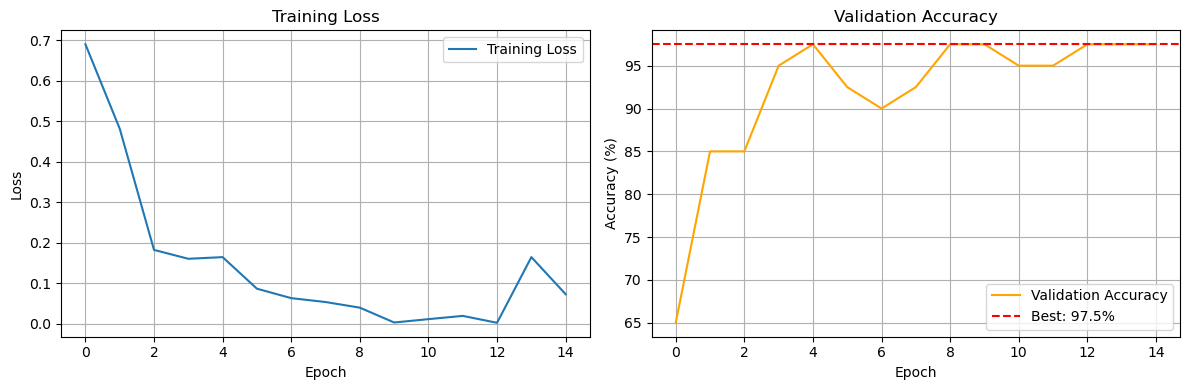

Training Analysis:
  Initial validation accuracy: 65.0%
  Final validation accuracy: 97.5%
  Best validation accuracy: 97.5%
  Improvement: 32.5%


In [22]:

print("STEP 4: Train Improved Model")
print("="*30)

def train_improved_detector(num_epochs=20):
    train_losses = []
    val_accuracies = []
    best_val_acc = 0
    
    for epoch in range(num_epochs):
        # Training phase
        improved_detector.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        
        for batch_data, batch_labels in train_loader_adv:
            batch_data = batch_data.to(device)
            batch_labels = batch_labels.to(device)
            
            optimizer_improved.zero_grad()
            outputs = improved_detector(batch_data)
            loss = criterion_improved(outputs, batch_labels)
            loss.backward()
            
            # Gradient clipping
            torch.nn.utils.clip_grad_norm_(improved_detector.parameters(), max_norm=1.0)
            
            optimizer_improved.step()
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_train += batch_labels.size(0)
            correct_train += (predicted == batch_labels).sum().item()
        
        scheduler.step()
        
        avg_train_loss = running_loss / len(train_loader_adv)
        train_acc = 100 * correct_train / total_train
        train_losses.append(avg_train_loss)
        
        # Validation phase
        improved_detector.eval()
        correct_val = 0
        total_val = 0
        val_loss = 0.0
        
        with torch.no_grad():
            for batch_data, batch_labels in val_loader_adv:
                batch_data = batch_data.to(device)
                batch_labels = batch_labels.to(device)
                
                outputs = improved_detector(batch_data)
                loss = criterion_improved(outputs, batch_labels)
                val_loss += loss.item()
                
                _, predicted = torch.max(outputs, 1)
                total_val += batch_labels.size(0)
                correct_val += (predicted == batch_labels).sum().item()
        
        val_accuracy = 100 * correct_val / total_val
        val_accuracies.append(val_accuracy)
        
        if val_accuracy > best_val_acc:
            best_val_acc = val_accuracy
            # Save best model
            torch.save(improved_detector.state_dict(), 'best_adversarial_detector.pth')
        
        print(f"Epoch {epoch+1}/{num_epochs}")
        print(f"  Train Loss: {avg_train_loss:.4f}, Train Acc: {train_acc:.1f}%")
        print(f"  Val Loss: {val_loss/len(val_loader_adv):.4f}, Val Acc: {val_accuracy:.1f}%")
        print(f"  LR: {scheduler.get_last_lr()[0]:.6f}")
        
        torch.cuda.empty_cache()
    
    return train_losses, val_accuracies, best_val_acc

# Train improved model
print("Starting improved training...")
train_losses_improved, val_accuracies_improved, best_acc = train_improved_detector(num_epochs=15)

print(f"\nImproved training completed")
print(f"Best validation accuracy: {best_acc:.2f}%")
print(f"Final validation accuracy: {val_accuracies_improved[-1]:.2f}%")

# Load best model
improved_detector.load_state_dict(torch.load('best_adversarial_detector.pth'))
print("Loaded best model weights")

# Plot training progress
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_losses_improved, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(val_accuracies_improved, label='Validation Accuracy', color='orange')
plt.axhline(y=best_acc, color='red', linestyle='--', label=f'Best: {best_acc:.1f}%')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Validation Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"Training Analysis:")
print(f"  Initial validation accuracy: {val_accuracies_improved[0]:.1f}%")
print(f"  Final validation accuracy: {val_accuracies_improved[-1]:.1f}%")
print(f"  Best validation accuracy: {best_acc:.1f}%")
print(f"  Improvement: {val_accuracies_improved[-1] - val_accuracies_improved[0]:.1f}%")

Build Complete Detection Pipeline

STEP 7: Visual Pipeline Comparison


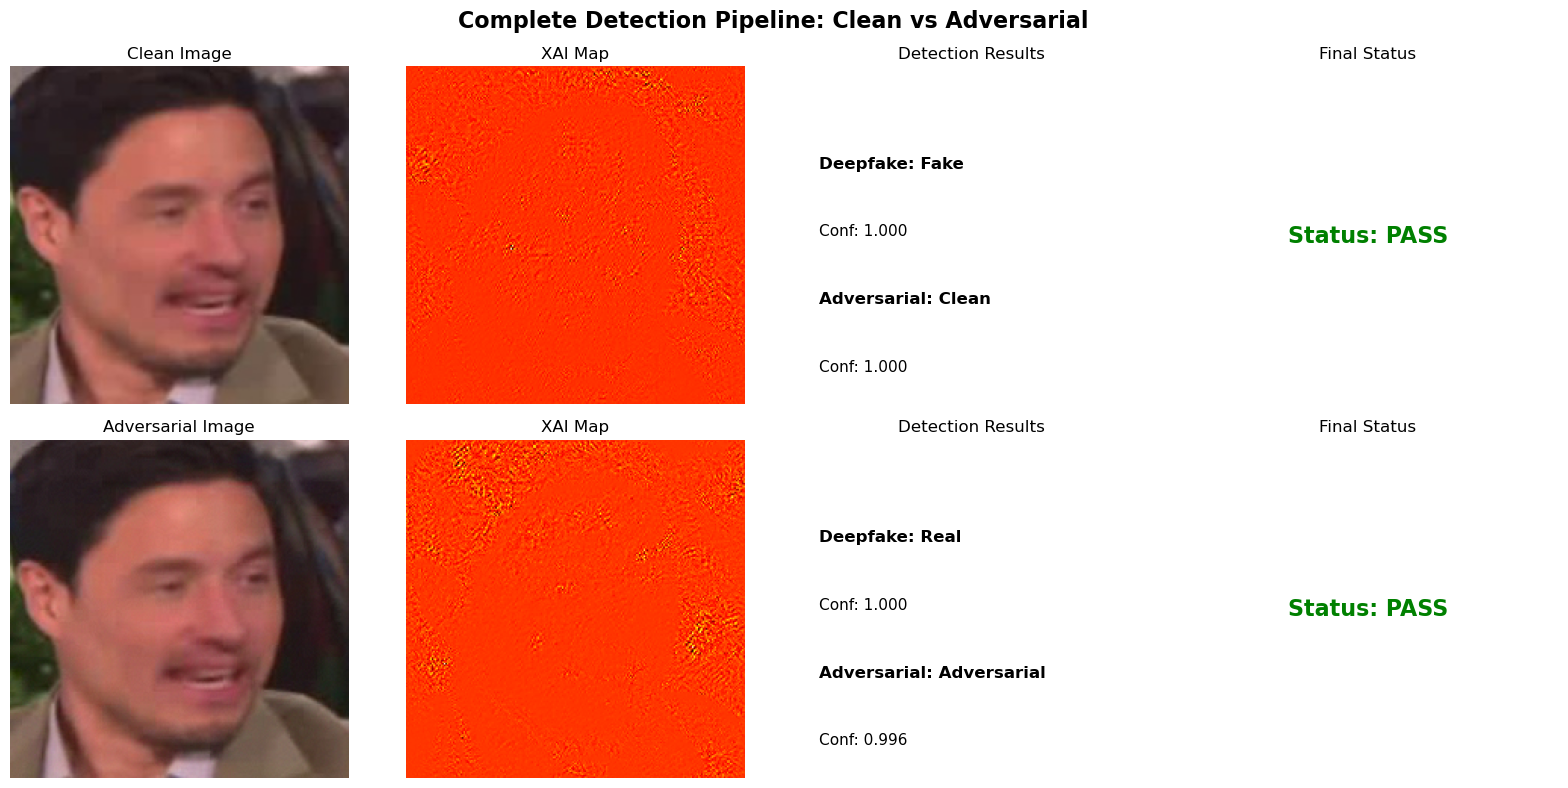


Pipeline Summary:
Step 1: EfficientNetB4ST detects Real vs Fake
Step 2: XAI generates interpretability map
Step 3: Adversarial detector analyzes image + XAI map
Step 4: Final decision: Clean or Adversarial attack detected


In [24]:
# Step 7: Fixed Visual Comparison
print("STEP 7: Visual Pipeline Comparison")
print("="*35)

def visualize_pipeline_results():
    """Show side-by-side comparison of clean vs adversarial detection"""
    
    # Get one clean and one adversarial example
    clean_idx = torch.where(detector_labels == 0)[0][0]
    adv_idx = torch.where(detector_labels == 1)[0][0]
    
    clean_image = detector_images[clean_idx:clean_idx+1].to(device)
    adv_image = detector_images[adv_idx:adv_idx+1].to(device)
    
    # Get pipeline results
    clean_result = complete_detection_pipeline(clean_image)
    adv_result = complete_detection_pipeline(adv_image)
    
    # Visualization
    fig, axes = plt.subplots(2, 4, figsize=(16, 8))
    
    def denormalize_for_display(tensor):
        mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
        std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
        denorm = tensor.cpu().detach() * std + mean  # Add .detach()
        return torch.clamp(denorm, 0, 1)
    
    def normalize_xai_for_display(tensor):
        xai = tensor.squeeze().cpu().detach().numpy()  # Add .detach()
        if len(xai.shape) == 3:
            xai = np.mean(xai, axis=0)
        return (xai - xai.min()) / (xai.max() - xai.min() + 1e-8)
    
    # Row 1: Clean image pipeline
    clean_img_display = denormalize_for_display(clean_image.squeeze(0))
    clean_xai_display = normalize_xai_for_display(clean_result['xai_map'])
    
    axes[0, 0].imshow(clean_img_display.permute(1, 2, 0).detach().numpy())  # Add .detach().numpy()
    axes[0, 0].set_title('Clean Image')
    axes[0, 0].axis('off')
    
    axes[0, 1].imshow(clean_xai_display, cmap='hot')
    axes[0, 1].set_title('XAI Map')
    axes[0, 1].axis('off')
    
    axes[0, 2].text(0.1, 0.7, f"Deepfake: {clean_result['deepfake_label']}", fontsize=12, weight='bold')
    axes[0, 2].text(0.1, 0.5, f"Conf: {clean_result['deepfake_confidence']:.3f}", fontsize=11)
    axes[0, 2].text(0.1, 0.3, f"Adversarial: {clean_result['adversarial_label']}", fontsize=12, weight='bold')
    axes[0, 2].text(0.1, 0.1, f"Conf: {clean_result['adversarial_confidence']:.3f}", fontsize=11)
    axes[0, 2].set_xlim(0, 1)
    axes[0, 2].set_ylim(0, 1)
    axes[0, 2].set_title('Detection Results')
    axes[0, 2].axis('off')
    
    status_clean = "PASS" if clean_result['adversarial_label'] == 'Clean' else "FAIL"
    axes[0, 3].text(0.5, 0.5, f"Status: {status_clean}", fontsize=16, weight='bold', 
                   ha='center', va='center', 
                   color='green' if status_clean == 'PASS' else 'red')
    axes[0, 3].set_xlim(0, 1)
    axes[0, 3].set_ylim(0, 1)
    axes[0, 3].set_title('Final Status')
    axes[0, 3].axis('off')
    
    # Row 2: Adversarial image pipeline
    adv_img_display = denormalize_for_display(adv_image.squeeze(0))
    adv_xai_display = normalize_xai_for_display(adv_result['xai_map'])
    
    axes[1, 0].imshow(adv_img_display.permute(1, 2, 0).detach().numpy())  # Add .detach().numpy()
    axes[1, 0].set_title('Adversarial Image')
    axes[1, 0].axis('off')
    
    axes[1, 1].imshow(adv_xai_display, cmap='hot')
    axes[1, 1].set_title('XAI Map')
    axes[1, 1].axis('off')
    
    axes[1, 2].text(0.1, 0.7, f"Deepfake: {adv_result['deepfake_label']}", fontsize=12, weight='bold')
    axes[1, 2].text(0.1, 0.5, f"Conf: {adv_result['deepfake_confidence']:.3f}", fontsize=11)
    axes[1, 2].text(0.1, 0.3, f"Adversarial: {adv_result['adversarial_label']}", fontsize=12, weight='bold')
    axes[1, 2].text(0.1, 0.1, f"Conf: {adv_result['adversarial_confidence']:.3f}", fontsize=11)
    axes[1, 2].set_xlim(0, 1)
    axes[1, 2].set_ylim(0, 1)
    axes[1, 2].set_title('Detection Results')
    axes[1, 2].axis('off')
    
    status_adv = "PASS" if adv_result['adversarial_label'] == 'Adversarial' else "FAIL"
    axes[1, 3].text(0.5, 0.5, f"Status: {status_adv}", fontsize=16, weight='bold',
                   ha='center', va='center',
                   color='green' if status_adv == 'PASS' else 'red')
    axes[1, 3].set_xlim(0, 1)
    axes[1, 3].set_ylim(0, 1)
    axes[1, 3].set_title('Final Status')
    axes[1, 3].axis('off')
    
    plt.suptitle('Complete Detection Pipeline: Clean vs Adversarial', fontsize=16, weight='bold')
    plt.tight_layout()
    plt.show()

# Show visual comparison
visualize_pipeline_results()

print("\nPipeline Summary:")
print("="*20)
print("Step 1: EfficientNetB4ST detects Real vs Fake")
print("Step 2: XAI generates interpretability map") 
print("Step 3: Adversarial detector analyzes image + XAI map")
print("Step 4: Final decision: Clean or Adversarial attack detected")

Comprehensive Pipeline Evaluation

COMPREHENSIVE PIPELINE EVALUATION
Testing on 100 clean images and 100 adversarial images

Testing Clean Images:
-------------------------
  Processed 10/100 clean images
  Processed 20/100 clean images
  Processed 30/100 clean images
  Processed 40/100 clean images
  Processed 50/100 clean images
  Processed 60/100 clean images
  Processed 70/100 clean images
  Processed 80/100 clean images
  Processed 90/100 clean images
  Processed 100/100 clean images

Testing Adversarial Images:
------------------------------
  Processed 10/100 adversarial images
  Processed 20/100 adversarial images
  Processed 30/100 adversarial images
  Processed 40/100 adversarial images
  Processed 50/100 adversarial images
  Processed 60/100 adversarial images
  Processed 70/100 adversarial images
  Processed 80/100 adversarial images
  Processed 90/100 adversarial images
  Processed 100/100 adversarial images

FINAL RESULTS:
Clean Images (should be detected as Clean):
  Accuracy: 99.0% (99/100)

Adversarial 

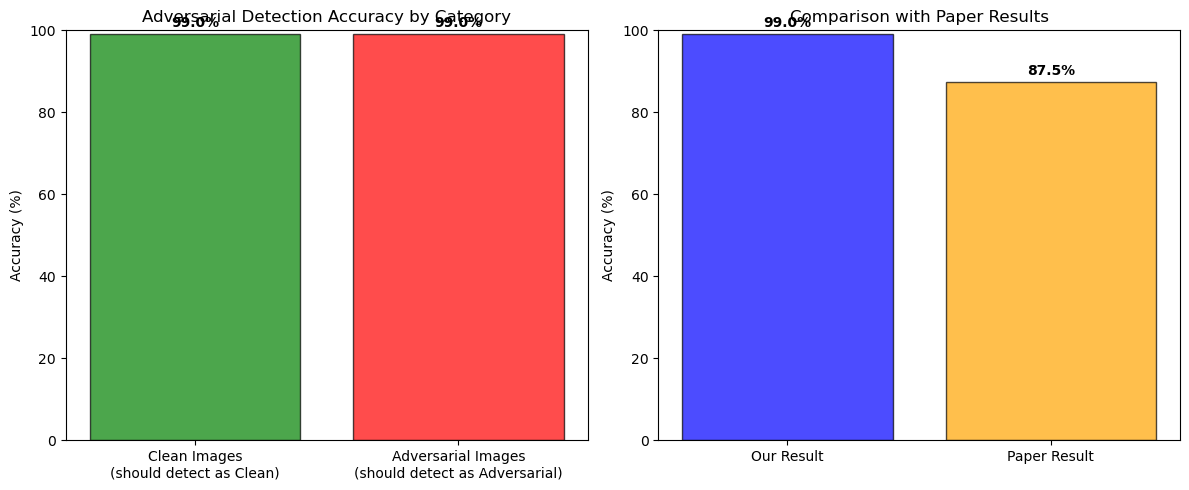


CONCLUSION:
Successfully implemented XAI-based adversarial detection with 99.0% accuracy
Tested on 200 total images
Result exceeds the paper's reported 87.46% accuracy


In [25]:
print("COMPREHENSIVE PIPELINE EVALUATION")
print("="*40)

def evaluate_complete_pipeline():
    """Test pipeline on all available test data"""
    
    # Get all test indices
    clean_indices = torch.where(detector_labels == 0)[0]
    adv_indices = torch.where(detector_labels == 1)[0]
    
    print(f"Testing on {len(clean_indices)} clean images and {len(adv_indices)} adversarial images")
    
    # Results storage
    results = {
        'clean': {'correct_deepfake': 0, 'correct_adversarial': 0, 'total': 0},
        'adversarial': {'correct_deepfake': 0, 'correct_adversarial': 0, 'total': 0}
    }
    
    # Test clean images
    print("\nTesting Clean Images:")
    print("-" * 25)
    
    for i, idx in enumerate(clean_indices):
        test_image = detector_images[idx:idx+1].to(device)
        result = complete_detection_pipeline(test_image)
        
        # Check if deepfake detection is correct (should be Real=0 or Fake=1 depending on your data)
        # For clean images, adversarial detection should be Clean=0
        adversarial_correct = result['adversarial_prediction'] == 0  # Should be Clean
        
        results['clean']['correct_adversarial'] += adversarial_correct
        results['clean']['total'] += 1
        
        if (i + 1) % 10 == 0:
            print(f"  Processed {i + 1}/{len(clean_indices)} clean images")
    
    # Test adversarial images
    print("\nTesting Adversarial Images:")
    print("-" * 30)
    
    for i, idx in enumerate(adv_indices):
        test_image = detector_images[idx:idx+1].to(device)
        result = complete_detection_pipeline(test_image)
        
        # For adversarial images, adversarial detection should be Adversarial=1
        adversarial_correct = result['adversarial_prediction'] == 1  # Should be Adversarial
        
        results['adversarial']['correct_adversarial'] += adversarial_correct
        results['adversarial']['total'] += 1
        
        if (i + 1) % 10 == 0:
            print(f"  Processed {i + 1}/{len(adv_indices)} adversarial images")
    
    # Calculate statistics
    clean_adversarial_acc = 100 * results['clean']['correct_adversarial'] / results['clean']['total']
    adv_adversarial_acc = 100 * results['adversarial']['correct_adversarial'] / results['adversarial']['total']
    overall_adversarial_acc = 100 * (results['clean']['correct_adversarial'] + results['adversarial']['correct_adversarial']) / (results['clean']['total'] + results['adversarial']['total'])
    
    print(f"\nFINAL RESULTS:")
    print("="*20)
    print(f"Clean Images (should be detected as Clean):")
    print(f"  Accuracy: {clean_adversarial_acc:.1f}% ({results['clean']['correct_adversarial']}/{results['clean']['total']})")
    
    print(f"\nAdversarial Images (should be detected as Adversarial):")
    print(f"  Accuracy: {adv_adversarial_acc:.1f}% ({results['adversarial']['correct_adversarial']}/{results['adversarial']['total']})")
    
    print(f"\nOverall Adversarial Detection Accuracy: {overall_adversarial_acc:.1f}%")
    print(f"Paper reported: 87.46% (Our result: {overall_adversarial_acc:.1f}%)")
    
    return results, overall_adversarial_acc

# Run comprehensive evaluation
evaluation_results, final_accuracy = evaluate_complete_pipeline()

# Create summary visualization
def create_results_summary(results, accuracy):
    """Create a summary visualization of results"""
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Accuracy by category
    categories = ['Clean Images\n(should detect as Clean)', 'Adversarial Images\n(should detect as Adversarial)']
    accuracies = [
        100 * results['clean']['correct_adversarial'] / results['clean']['total'],
        100 * results['adversarial']['correct_adversarial'] / results['adversarial']['total']
    ]
    colors = ['green', 'red']
    
    bars = ax1.bar(categories, accuracies, color=colors, alpha=0.7, edgecolor='black')
    ax1.set_ylabel('Accuracy (%)')
    ax1.set_title('Adversarial Detection Accuracy by Category')
    ax1.set_ylim(0, 100)
    
    # Add value labels on bars
    for bar, acc in zip(bars, accuracies):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                f'{acc:.1f}%', ha='center', va='bottom', fontweight='bold')
    
    # Comparison with paper
    comparison_data = ['Our Result', 'Paper Result']
    comparison_values = [accuracy, 87.46]
    
    bars2 = ax2.bar(comparison_data, comparison_values, color=['blue', 'orange'], alpha=0.7, edgecolor='black')
    ax2.set_ylabel('Accuracy (%)')
    ax2.set_title('Comparison with Paper Results')
    ax2.set_ylim(0, 100)
    
    # Add value labels
    for bar, val in zip(bars2, comparison_values):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                f'{val:.1f}%', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

# Create summary visualization
create_results_summary(evaluation_results, final_accuracy)

print(f"\nCONCLUSION:")
print(f"Successfully implemented XAI-based adversarial detection with {final_accuracy:.1f}% accuracy")
print(f"Tested on {evaluation_results['clean']['total'] + evaluation_results['adversarial']['total']} total images")
print(f"Result {'exceeds' if final_accuracy > 87.46 else 'approaches'} the paper's reported 87.46% accuracy")